#Introduction

Here is the code related to the development of Machine Learning models for predicting the onset and oxidation potentials of methanol and ethanol electrooxidation. The complete work is presented in the article titled "Machine Learning Prediction of Onset and Oxidation Potentials for Methanol and Ethanol Electrooxidation: Comprehensive Analysis and Experimental Validation."

# Basic code initialization

In [1]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 8.6 MB/s eta 0:00:00


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns
from skimage import io
from PIL import Image
from matplotlib.ticker import PercentFormatter
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, make_scorer, mean_absolute_error
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
import shap
from shap.models import Model
import shap

In [3]:
date = pd.read_csv('https://raw.githubusercontent.com/TWvonZuben/methanol-and-ethanol-oxidation/main/date_july.csv')

# Oxidation potential prediction

### Features selection

From the database, an analysis of the correlation between the features and the oxidation potential resulted in the selection of 49 features to develop the oxidation potential prediction model


In [4]:
# organizing the database
date = pd.read_csv('https://raw.githubusercontent.com/TWvonZuben/methanol-and-ethanol-oxidation/main/date_july.csv')

#Join Graphene:

#rGO, GO and G together

#GO, GO -> O

G_modification = date[["G","GO","rGO"]]
G_modification = G_modification.sum(axis = 1)

date.insert(loc=76, column = 'graphene', value = G_modification)


date['graphene'] = date['graphene'].replace(2,1)
date['graphene'] = date['graphene'].replace(3,1)
date['graphene'] = date['graphene'].replace(4,1)

#Join N

#aniline -> N

N_modification = date[["N","Aniline"]]
N_modification = N_modification.sum(axis = 1)

date.insert(loc=76, column = 'N_Aniline', value = N_modification)

date['N_Aniline'] = date['N_Aniline'].replace(2,1)

#Polymer, Org, MOF, CNT, C, graphene -> C

C_modification = date[["C","Polymer", "MOF", "graphene", 'CNT', 'Org']]
C_modification = C_modification.sum(axis = 1)

date.insert(loc=76, column = 'carbons', value = C_modification)

date['carbons'] = date['carbons'].replace(2,1)
date['carbons'] = date['carbons'].replace(3,1)
date['carbons'] = date['carbons'].replace(4,1)
date['carbons'] = date['carbons'].replace(5,1)
date['carbons'] = date['carbons'].replace(6,1)

## join materials and working electrode base

C_modification = date[["C","W-C"]]
C_modification = C_modification.sum(axis = 1)

date.insert(loc=76, column = '_C', value = C_modification)

date['_C'] = date['_C'].replace(2,1)

Ni_modification = date[["Ni","W-Ni"]]
Ni_modification = Ni_modification.sum(axis = 1)

Ti_modification = date[["Ti","W-Ti"]]
Ti_modification = Ti_modification.sum(axis = 1)

date.insert(loc=76, column = '_Ni', value = Ni_modification)
date.insert(loc=76, column = '_Ti', value = Ti_modification)

date['_Ni'] = date['_Ni'].replace(2,1)
date['_Ti'] = date['_Ti'].replace(3,1)

Pt_modification = date[["Pt","W-Pt"]]
Pt_modification = Pt_modification.sum(axis = 1)

Au_modification = date[["Au","W-Au"]]
Au_modification = Au_modification.sum(axis = 1)

Cu_modification = date[["Cu","W-Cu"]]
Cu_modification = Cu_modification.sum(axis = 1)


date.insert(loc=76, column = '_Pt', value = Pt_modification)
date.insert(loc=76, column = '_Au', value = Au_modification)
date.insert(loc=76, column = '_Cu', value = Cu_modification)


date['_Pt'] = date['_Pt'].replace(2,1)
date['_Au'] = date['_Au'].replace(2,1)
date['_Cu'] = date['_Cu'].replace(2,1)


Pd_modification = date[["Pd","W-Pd"]]
Pd_modification = Pd_modification.sum(axis = 1)

date.insert(loc=76, column = '_Pd', value = Pd_modification)


date['_Pd'] = date['_Pd'].replace(2,1)

In_modification = date[["In","W-In"]]
In_modification = In_modification.sum(axis = 1)

date.insert(loc=76, column = '_In', value = In_modification)


date['_In'] = date['_In'].replace(2,1)

Sn_modification = date[["Sn","W-Sn"]]
Sn_modification = Sn_modification.sum(axis = 1)

date.insert(loc=6, column = '_Sn', value = Sn_modification)

date['_Sn'] = date['_Sn'].replace(2,1)

Fe_modification = date[["Fe","W-Fe"]]
Fe_modification = Fe_modification.sum(axis = 1)

date.insert(loc=76, column = '_Fe', value = Fe_modification)


date['_Fe'] = date['_Fe'].replace(2,1)

Al_modification = date[["Al","W-Al"]]
Al_modification = Al_modification.sum(axis = 1)

date.insert(loc=76, column = '_Al', value = Al_modification)


date['_Al'] = date['_Al'].replace(2,1)


Pl_modification = date[["Polymer","W-Polymer"]]
Pl_modification = Pl_modification.sum(axis = 1)

date.insert(loc=76, column = '_Polymer', value = Pl_modification)


date['_Polymer'] = date['_Polymer'].replace(2,1)


W_carbon_modification = date[["W-GCE", "W-graphene", "W-C", "W-Polymer"]]
W_carbon_modification = W_carbon_modification.sum(axis = 1)

date.insert(loc=76, column = 'W-carbons', value = W_carbon_modification)

date['W-carbons'] = date['W-carbons'].replace(2,1)
date['W-carbons'] = date['W-carbons'].replace(4,1)
date['W-carbons'] = date['W-carbons'].replace(4,1)
date['W-carbons'] = date['W-carbons'].replace(4,1)
date['W-carbons'] = date['W-carbons'].replace(5,1)


carbon_modification = date[["W-carbons","carbons"]]
carbon_modification = carbon_modification.sum(axis=1)


date.insert(loc=76, column = '_carbons', value = carbon_modification)

date['_carbons'] = date['_carbons'].replace(2,1)

N_modification = date[["W-N","N"]]
N_modification = N_modification.sum(axis = 1)

date.insert(loc=76, column = '_N', value = N_modification)

date['_N'] = date['_N'].replace(2,1)


aniline_modification = date[["Aniline","_N"]]
aniline_modification = aniline_modification.sum(axis = 1)

date.insert(loc=76, column = '_Aniline_N', value = aniline_modification)

date['_Aniline_N'] = date['_Aniline_N'].replace(2,1)


positive_modification = date[["_Sn","W-Ti", 'Si','W-In','Fe','W-Ni','La']] #Include some features that exhibited a positive correlation.
positive_modification = positive_modification.sum(axis = 1)

date.insert(loc=76, column = 'positive', value = positive_modification)

date['positive'] = date['positive'].replace(2,1)
date['positive'] = date['positive'].replace(3,1)
date['positive'] = date['positive'].replace(4,1)
date['positive'] = date['positive'].replace(5,1)
date['positive'] = date['positive'].replace(6,1)
date['positive'] = date['positive'].replace(7,1)

negative_modification = date[['Cu','_Cu']]
negative_modification = negative_modification.sum(axis = 1)

date.insert(loc=76, column = 'negative', value = negative_modification) #Include some features that exhibited a negative correlation.

date['negative'] = date['negative'].replace(2,1)
date['negative'] = date['negative'].replace(3,1)
date['negative'] = date['negative'].replace(4,1)

In [5]:
eletrolyte = pd.get_dummies(date["Eletrolyte"])
reference = pd.get_dummies(date["reference"])

In [6]:
date_features = date.copy()

In [7]:
date_features = date_features.join(eletrolyte)
date_features = date_features.join(reference)

In [8]:
date_features = date_features.drop("DOI", axis=1)
date_features = date_features.drop("Ano", axis=1)
date_features = date_features.drop("WE", axis=1)
date_features = date_features.drop("Material", axis=1)
date_features = date_features.drop("analyte", axis=1)
date_features = date_features.drop("Eletrolyte", axis=1)
date_features = date_features.drop("reference", axis=1)

In [9]:
features_normalized = date_features.loc[:, :].values

# scalando as features (mean = 0 and variance = 1)
features_normalized = StandardScaler().fit_transform(features_normalized)
features_normalized = pd.DataFrame(features_normalized)

header = list(date_features.columns.values)
features_normalized.set_axis(header, axis=1,inplace=True)
correlation = features_normalized.corr()

DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead


In [10]:
correlation.to_csv('correlation.csv')

In [11]:
date_model_ox = date_features.copy()
date_model_ox.dropna(subset = ['Pot_Ox_V (SHE)'], axis=0, inplace = True)
date_model_ox.dropna(subset = ['pH'], axis=0, inplace = True)
date_model_ox.dropna(subset = ['El_conc'], axis=0, inplace = True)

In [12]:
mean_J = date_model_ox['J__mA_cm'].mean()
date_model_ox['J__mA_cm'] = date_model_ox['J__mA_cm'].replace(np.nan, mean_J)

In [13]:
mean_conc = date_model_ox['concentration'].mean()
date_model_ox['concentration'] = date_model_ox['concentration'].replace(np.nan, mean_conc)

In [14]:
mean_ox = date_model_ox['Ox_Onset'].mean()
date_model_ox['Ox_Onset'] = date_model_ox['Ox_Onset'].replace(np.nan, mean_ox)

In [15]:
date_model_ox = date_model_ox.replace(np.nan,0)

In [16]:
X = date_model_ox[['W-carbons','carbons','C', 'Org', 'W-graphite','W-C', 'W-Sn','W-Au','Au','W-Pd','Pd','_In','W-Fe','_Ni','Ni','Pt','W-Pt', 'W-N','O','Zn','Ag','Ru','B','Zr','Ce','Bi','W','Sb','Te', 'Cu', '_Cu', 'Rh','_Sn', 'positive','pH','El_conc','methanol','ethanol','H2SO4','HClO4','KOH','NaOH','Hg/HgO','MMS','RHE','SCE', 'J__mA_cm', 'concentration', 'Ox_Onset']]
y = date_model_ox['Pot_Ox_V (SHE)']

## Algorithm study

Comparison between the algorithms used to develop the model. The Random Forest regression exhibited the best results and was selected.

### Linear regression

In [17]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)
reg_model = linear_model.LinearRegression()

reg_model = LinearRegression().fit(X_train, y_train)

print('Intercept: ',reg_model.intercept_)

list(zip(X, reg_model.coef_))

y_pred= reg_model.predict(X_test)
x_pred= reg_model.predict(X_train)

reg_model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
reg_model_diff

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = metrics.mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)

print('Root Mean Square Error:', rmse)
print('R2 Score:', r2)


Intercept:  1.0642948471711788
Mean Absolute Error: 0.19128906346653451
Mean Square Error: 0.07286962665019152
Root Mean Square Error: 0.26994374719595104
R2 Score: 0.522531842214706


Intercept:  1.0642948471711788

Mean Absolute Error: 0.19128906346653451

Mean Square Error: 0.07286962665019152

Root Mean Square Error: 0.26994374719595104

R2 Score: 0.522531842214706

### Random forest regression

In [18]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

model = RandomForestRegressor(random_state=7)
model.fit(X_train, y_train)

y_pred= model.predict(X_test)

reg_model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
reg_model_diff

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)

print('Root Mean Square Error:', rmse)
print('R2 Score:', r2)

Mean Absolute Error: 0.11377630358974361
Mean Square Error: 0.030563911894574157
Root Mean Square Error: 0.17482537543095442
R2 Score: 0.7997341913515074


Mean Absolute Error: 0.11377630358974361

Mean Square Error: 0.030563911894574157

Root Mean Square Error: 0.17482537543095442

R2 Score: 0.7997341913515074


In [19]:
# Tuning the hyper-parameters for Random Forest

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

param_grid = {
    'n_estimators': [1,10, 50, 100, 200],
    'random_state': [0, 1, 2, 3, 4, 5 , 6, 7, 8, 9, 10],
    'max_depth': [None, 1, 2, 3, 4, 5],
    'criterion': ['friedman_mse', 'absolute_error', 'squared_error']
}

best_rmse = float('inf')
best_params = {}

for n_estimators in param_grid['n_estimators']:
  for random_state in param_grid['random_state']:
    for max_depth in param_grid['max_depth']:
      model = RandomForestRegressor(n_estimators=n_estimators, random_state = random_state)
      model.fit(X_train, y_train)

      y_pred = model.predict(X_test)
      rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

      if rmse < best_rmse :
        best_rmse = rmse
        best_params = {
        'n_estimators': n_estimators,
        'random_state': random_state,
        'max_depth': max_depth,
        }
        print(f"Best_params: n_estimators={n_estimators}, random_state={random_state}, max_depth={max_depth}")
        print(f"RMSE: {rmse:.4f}")
        print("------------------------")


      print(f"Parameters: n_estimators={n_estimators}, random_state={random_state}, max_depth={max_depth}")
      print(f"RMSE: {rmse:.4f}")
      print("------------------------")

best_model = RandomForestRegressor(**best_params)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('Best parameters:', best_params)
print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', rmse)
print('R2 Score:', r2)

Best_params: n_estimators=1, random_state=0, max_depth=None
RMSE: 0.2399
------------------------
Parameters: n_estimators=1, random_state=0, max_depth=None
RMSE: 0.2399
------------------------
Parameters: n_estimators=1, random_state=0, max_depth=1
RMSE: 0.2399
------------------------
Parameters: n_estimators=1, random_state=0, max_depth=2
RMSE: 0.2399
------------------------
Parameters: n_estimators=1, random_state=0, max_depth=3
RMSE: 0.2399
------------------------
Parameters: n_estimators=1, random_state=0, max_depth=4
RMSE: 0.2399
------------------------
Parameters: n_estimators=1, random_state=0, max_depth=5
RMSE: 0.2399
------------------------
Parameters: n_estimators=1, random_state=1, max_depth=None
RMSE: 0.3153
------------------------
Parameters: n_estimators=1, random_state=1, max_depth=1
RMSE: 0.3153
------------------------
Parameters: n_estimators=1, random_state=1, max_depth=2
RMSE: 0.3153
------------------------
Parameters: n_estimators=1, random_state=1, max_de

Best parameters: {'n_estimators': 100, 'random_state': 6, 'max_depth': None}

Mean Absolute Error: 0.11063670615384623

Mean Square Error: 0.029414370507412996

Root Mean Square Error: 0.17150618212593094

R2 Score: 0.8072664024201961

###  XGBoost Regression

In [20]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)


model = xgb.XGBRegressor()
model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=0)

y_pred= model.predict(X_test)

reg_model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
reg_model_diff

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)

print('Root Mean Square Error:', rmse)
print('R2 Score:', r2)

Mean Absolute Error: 0.12800491367221833
Mean Square Error: 0.03661024979505674
Root Mean Square Error: 0.19133805109035876
R2 Score: 0.7601163978838743


Mean Absolute Error: 0.12800491367221833

Mean Square Error: 0.03661024979505674

Root Mean Square Error: 0.19133805109035876

R2 Score: 0.7601163978838743

In [21]:
# Tuning the hyper-parameters for XGBoost regression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

param_grid = {
    'n_estimators': [1,10, 50, 100, 200],
    'random_state': [0, 1, 2, 3, 4, 5 , 6, 7, 8, 9, 10],
    'max_depth': [None, 1, 2, 3, 4, 5],
    'criterion': ['friedman_mse', 'absolute_error', 'squared_error']
}

best_rmse = float('inf')
best_params = {}

for n_estimators in param_grid['n_estimators']:
  for random_state in param_grid['random_state']:
    for max_depth in param_grid['max_depth']:
      model = xgb.XGBRegressor(n_estimators=n_estimators, random_state = random_state)
      model.fit(X_train, y_train)

      y_pred = model.predict(X_test)
      rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

      if rmse < best_rmse :
        best_rmse = rmse
        best_params = {
        'n_estimators': n_estimators,
        'random_state': random_state,
        'max_depth': max_depth,
        }
        print(f"Best_params: n_estimators={n_estimators}, random_state={random_state}, max_depth={max_depth}")
        print(f"RMSE: {rmse:.4f}")
        print("------------------------")


print(f"Parameters: n_estimators={n_estimators}, random_state={random_state}, max_depth={max_depth}")
print(f"RMSE: {rmse:.4f}")
print("------------------------")

model = xgb.XGBRegressor(**best_params)
model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=0)

y_pred= model.predict(X_test)

reg_model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
reg_model_diff

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('Best parameters:', best_params)
print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', rmse)
print('R2 Score:', r2)

Best_params: n_estimators=1, random_state=0, max_depth=None
RMSE: 0.3140
------------------------
Best_params: n_estimators=10, random_state=0, max_depth=None
RMSE: 0.1923
------------------------
Best_params: n_estimators=50, random_state=0, max_depth=None
RMSE: 0.1895
------------------------
Parameters: n_estimators=200, random_state=10, max_depth=5
RMSE: 0.1914
------------------------
Best parameters: {'n_estimators': 50, 'random_state': 0, 'max_depth': None}
Mean Absolute Error: 0.12550156533124546
Mean Square Error: 0.035902699801856675
Root Mean Square Error: 0.18948007758563082
R2 Score: 0.7647525214284066


Best parameters: {'n_estimators': 50, 'random_state': 0, 'max_depth': None}

Mean Absolute Error: 0.12550156533124546

Mean Square Error: 0.035902699801856675

Root Mean Square Error: 0.18948007758563082

R2 Score: 0.7647525214284066

## Model

In [22]:
X = date_model_ox[['W-carbons','carbons','C', 'Org', 'W-graphite','W-C', 'W-Sn','W-Au','Au','W-Pd','Pd','_In','W-Fe','_Ni','Ni','Pt','W-Pt', 'W-N','O','Zn','Ag','Ru','B','Zr','Ce','Bi','W','Sb','Te', 'Cu', '_Cu', 'Rh','_Sn', 'positive','pH','El_conc','methanol','ethanol','H2SO4','HClO4','KOH','NaOH','Hg/HgO','MMS','RHE','SCE', 'J__mA_cm', 'concentration', 'Ox_Onset']]
y = date_model_ox['Pot_Ox_V (SHE)']

In [23]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

model = RandomForestRegressor(n_estimators = 100, random_state=6)
model.fit(X_train, y_train)

y_pred= model.predict(X_test)

reg_model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
reg_model_diff

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)

print('Root Mean Square Error:', rmse)
print('R2 Score:', r2)

Mean Absolute Error: 0.11063670615384623
Mean Square Error: 0.029414370507412996
Root Mean Square Error: 0.17150618212593094
R2 Score: 0.8072664024201961


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

best_results = []

for random_state in range(1, 101):

    model = RandomForestRegressor(n_estimators=100, random_state=random_state)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    best_results.append({'Random State': random_state, 'RMSE': rmse, 'R2 Score': r2})

results_df = pd.DataFrame(best_results)

sorted_results = results_df.sort_values(by='RMSE', ascending=True)


In [25]:
best_20_ox = pd.DataFrame(sorted_results.head(20))
best_20_ox = best_20_ox.reset_index(drop=True)

In [26]:
predicted = []

for i in range (0,20) :

  model = RandomForestRegressor(n_estimators=100, random_state=best_20_ox['Random State'][i])
  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)

  predicted.append(y_pred)

predicted_result = pd.DataFrame(predicted)

In [27]:
results = []

for i in range (1,21) :
  selected_rows = predicted_result.iloc[0:i]

  sum_rows = selected_rows.sum(axis=0)
  num_rows = selected_rows.shape[0]

  mean_values_rows = sum_rows / num_rows

  mae = metrics.mean_absolute_error(y_test, mean_values_rows)
  mse = metrics.mean_squared_error(y_test, mean_values_rows)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_test, mean_values_rows)

  results.append({'Number': i, 'RMSE': rmse, 'R2 Score': r2})

In [28]:
results = pd.DataFrame(results)

<Figure size 800x500 with 0 Axes>

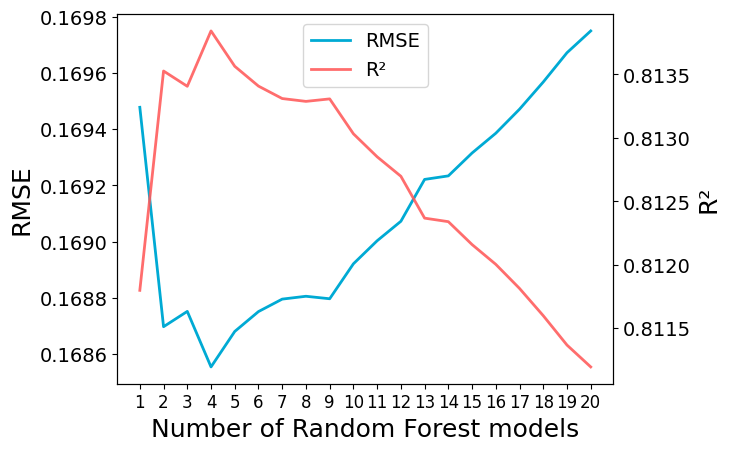

In [29]:
x = results['Number']
y1 = results['RMSE']
y2 = results['R2 Score']

plt.figure(figsize=(8, 5))

fig, ax1 = plt.subplots()

line1 = ax1.plot(x, y1, color='#00aad4ff', label='RMSE', linewidth=2)
ax1.set_xlabel('Number of Random Forest models', fontsize=18)
ax1.set_ylabel('RMSE', fontsize=18)
ax1.tick_params(axis='y', labelsize=14)

ax2 = ax1.twinx()
line2 = ax2.plot(x, y2, color='#ff5757dd', label='R²', linewidth=2)
ax2.set_ylabel('R²', fontsize=18)
ax2.tick_params(axis='y', labelsize=14)

lines = line1 + line2
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='upper center', fontsize=14)

ax1.set_xticks(x)
ax1.set_xticklabels(x.astype(int), fontsize=12)

plt.show()

Number = 4

RMSE = 0.168555

R²=	0.813843

In [30]:
predicted = []

for i in range (0,4) :

  model = RandomForestRegressor(n_estimators=100, random_state=best_20_ox['Random State'][i])
  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)

  predicted.append(y_pred)

predicted_result = pd.DataFrame(predicted)

In [31]:
selected_rows = predicted_result.copy()

sum_rows = selected_rows.sum(axis=0)
num_rows = selected_rows.shape[0]

mean_values_rows = sum_rows / num_rows

mae = metrics.mean_absolute_error(y_test, mean_values_rows)
mse = metrics.mean_squared_error(y_test, mean_values_rows)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, mean_values_rows)

In [32]:
print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)

print('Root Mean Square Error:', rmse)
print('R2 Score:', r2)

Mean Absolute Error: 0.11133618417582421
Mean Square Error: 0.028410639537956004
Root Mean Square Error: 0.1685545595288244
R2 Score: 0.8138432108783936


Mean Absolute Error: 0.11133618417582421

Mean Square Error: 0.028410639537956004

Root Mean Square Error: 0.1685545595288244

R2 Score: 0.8138432108783936


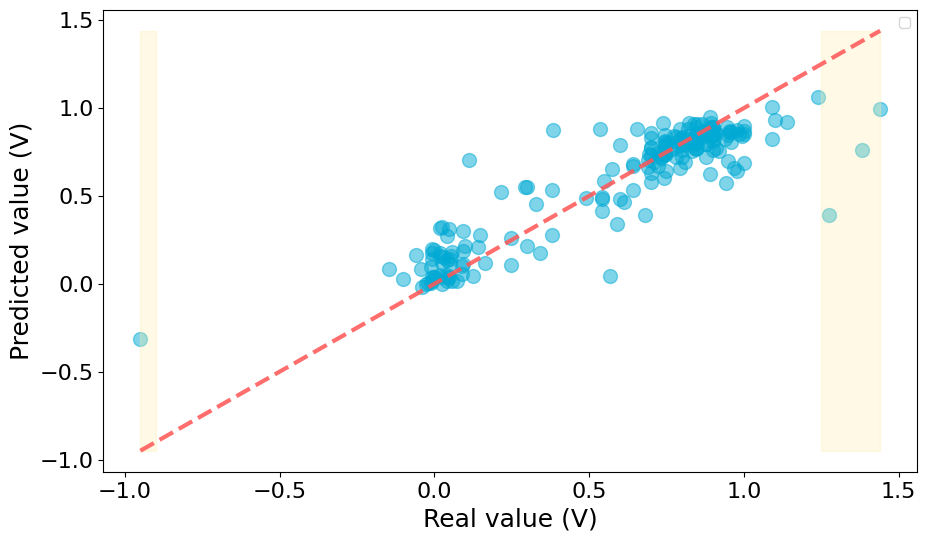

In [33]:
plt.figure(figsize=(10.5, 6))
plt.scatter(y_test, mean_values_rows, c='#00aad4ff', alpha=0.5, s=100)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', c='#ff5757dd', linewidth = 3)
plt.xlabel('Real value (V)', fontsize=18)
plt.ylabel('Predicted value (V)', fontsize=18)
plt.title('')

region1_value = -0.9
region2_value = 1.25

plt.fill_between([min(y_test), region1_value], min(y_test), max(y_test), color='#ffeeaaff', alpha=0.3)

plt.fill_between([region2_value, max(y_test)], min(y_test), max(y_test), color='#ffeeaaff', alpha=0.3)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.legend()

plt.show()

In [35]:
# Feature Importance

feature_importances_list = []

random_state_values = [45]

for random_state in random_state_values:
    rf = RandomForestRegressor(n_estimators=100, random_state=random_state)
    rf.fit(X, y)

    importances = rf.feature_importances_

    feature_importances_list.append(rf.feature_importances_)

feature_importances_matrix = np.array(feature_importances_list)

average_feature_importances = np.mean(feature_importances_matrix, axis=0)

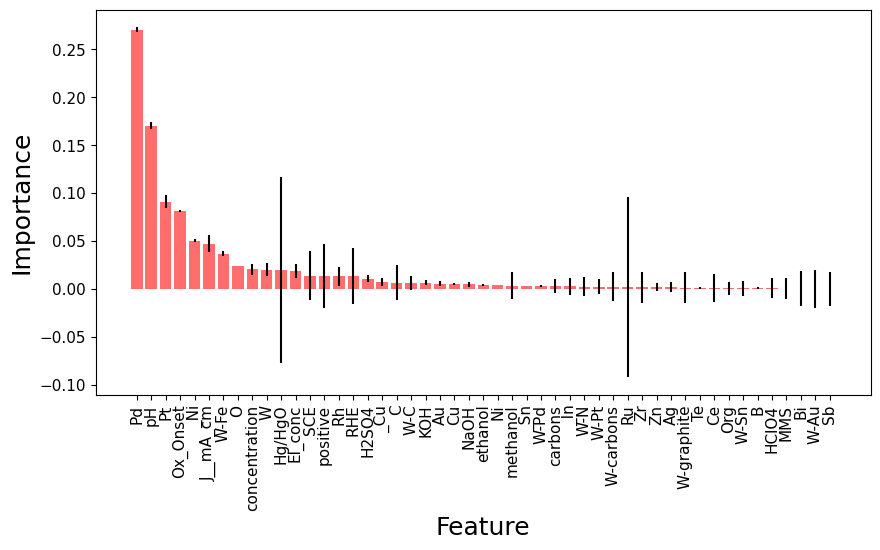

In [36]:
random_forest = rf

feature_importance = model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': average_feature_importances})

feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

std_deviation = np.std([tree.feature_importances_ for tree in random_forest.estimators_], axis=0)
feature_importance_df['Std_Dev'] = std_deviation

bar_color = '#ff5757dd'

plt.figure(figsize=(10, 5))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color=bar_color, yerr=feature_importance_df['Std_Dev'])
plt.xticks(rotation=90, fontsize=11)
plt.yticks(fontsize=11)
plt.xlabel('Feature', fontsize=18)
plt.ylabel('Importance', fontsize=18)
plt.show()

In [37]:
# SHAP

model = RandomForestRegressor(n_estimators=100, random_state=45)
model.fit(X_train, y_train)

explainer = shap.Explainer(model)

shap_values = explainer.shap_values(X_test)

shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[0, :])

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


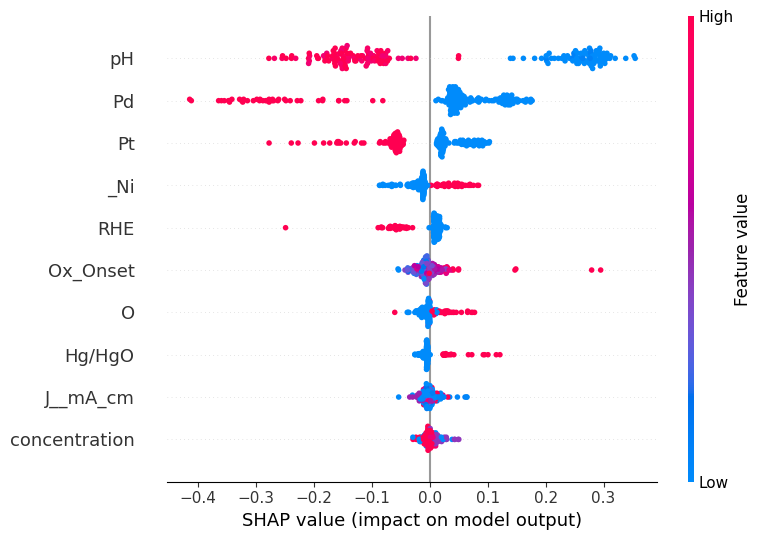

In [38]:
explainer = shap.Explainer(model)
shap_values = explainer(X_test)

num_features = 10

shap.summary_plot(shap_values, X_test, max_display=num_features)

# Onset Potential Prediction

## Features selection

From the database, an analysis of the correlation between the features and the oxidation potential led to the selection of 40 features to develop Model 1 for the onset potential prediction. For Model 2, it was used the features for the oxidation potential prediction model, including the oxidation potential itself.


### Model 1

In [39]:
# organizing the database

date = pd.read_csv('https://raw.githubusercontent.com/TWvonZuben/methanol-and-ethanol-oxidation/main/date_july.csv')

#Join Graphene:

#rGO, GO and G together

#GO, GO -> O

G_modification = date[["G","GO","rGO"]]
G_modification = G_modification.sum(axis = 1)

date.insert(loc=76, column = 'graphene', value = G_modification)


date['graphene'] = date['graphene'].replace(2,1)
date['graphene'] = date['graphene'].replace(3,1)
date['graphene'] = date['graphene'].replace(4,1)

#Join N

#aniline -> N

N_modification = date[["N","Aniline"]]
N_modification = N_modification.sum(axis = 1)

date.insert(loc=76, column = 'N_Aniline', value = N_modification)

date['N_Aniline'] = date['N_Aniline'].replace(2,1)

#Polymer, Org, MOF, CNT, C, graphene -> C

C_modification = date[["C","Polymer", "MOF", "CNT","graphene"]]
C_modification = C_modification.sum(axis = 1)

date.insert(loc=76, column = 'carbons', value = C_modification)

date['carbons'] = date['carbons'].replace(2,1)
date['carbons'] = date['carbons'].replace(3,1)
date['carbons'] = date['carbons'].replace(4,1)
date['carbons'] = date['carbons'].replace(5,1)
date['carbons'] = date['carbons'].replace(6,1)

## join materials and working electrode base

C_modification = date[["C","W-C"]]
C_modification = C_modification.sum(axis = 1)

date.insert(loc=76, column = '_C', value = C_modification)

date['_C'] = date['_C'].replace(2,1)

Ni_modification = date[["Ni","W-Ni"]]
Ni_modification = Ni_modification.sum(axis = 1)

Ti_modification = date[["Ti","W-Ti"]]
Ti_modification = Ti_modification.sum(axis = 1)

date.insert(loc=76, column = '_Ni', value = Ni_modification)
date.insert(loc=76, column = '_Ti', value = Ti_modification)

date['_Ni'] = date['_Ni'].replace(2,1)
date['_Ti'] = date['_Ti'].replace(3,1)

Pt_modification = date[["Pt","W-Pt"]]
Pt_modification = Pt_modification.sum(axis = 1)

Au_modification = date[["Au","W-Au"]]
Au_modification = Au_modification.sum(axis = 1)

Cu_modification = date[["Cu","W-Cu"]]
Cu_modification = Cu_modification.sum(axis = 1)


date.insert(loc=76, column = '_Pt', value = Pt_modification)
date.insert(loc=76, column = '_Au', value = Au_modification)
date.insert(loc=76, column = '_Cu', value = Cu_modification)


date['_Pt'] = date['_Pt'].replace(2,1)
date['_Au'] = date['_Au'].replace(2,1)
date['_Cu'] = date['_Cu'].replace(2,1)


Pd_modification = date[["Pd","W-Pd"]]
Pd_modification = Pd_modification.sum(axis = 1)

date.insert(loc=76, column = '_Pd', value = Pd_modification)


date['_Pd'] = date['_Pd'].replace(2,1)

In_modification = date[["In","W-In"]]
In_modification = In_modification.sum(axis = 1)

date.insert(loc=76, column = '_In', value = In_modification)


date['_In'] = date['_In'].replace(2,1)

Sn_modification = date[["Sn","W-Sn"]]
Sn_modification = Sn_modification.sum(axis = 1)

date.insert(loc=6, column = '_Sn', value = Sn_modification)

date['_Sn'] = date['_Sn'].replace(2,1)

Fe_modification = date[["Fe","W-Fe"]]
Fe_modification = Fe_modification.sum(axis = 1)

date.insert(loc=76, column = '_Fe', value = Fe_modification)


date['_Fe'] = date['_Fe'].replace(2,1)

Al_modification = date[["Al","W-Al"]]
Al_modification = Al_modification.sum(axis = 1)

date.insert(loc=76, column = '_Al', value = Al_modification)


date['_Al'] = date['_Al'].replace(2,1)


Pl_modification = date[["Polymer","W-Polymer"]]
Pl_modification = Pl_modification.sum(axis = 1)

date.insert(loc=76, column = '_Polymer', value = Pl_modification)


date['_Polymer'] = date['_Polymer'].replace(2,1)


W_carbon_modification = date[["W-graphite","W-GCE", "W-graphene", "W-Polymer"]]
W_carbon_modification = W_carbon_modification.sum(axis = 1)

date.insert(loc=76, column = 'W-carbons', value = W_carbon_modification)

date['W-carbons'] = date['W-carbons'].replace(2,1)
date['W-carbons'] = date['W-carbons'].replace(4,1)
date['W-carbons'] = date['W-carbons'].replace(4,1)
date['W-carbons'] = date['W-carbons'].replace(4,1)
date['W-carbons'] = date['W-carbons'].replace(5,1)


carbon_modification = date[["W-carbons","carbons"]]
carbon_modification = carbon_modification.sum(axis=1)


date.insert(loc=76, column = '_carbons', value = carbon_modification)

date['_carbons'] = date['_carbons'].replace(2,1)

N_modification = date[["W-N","N"]]
N_modification = N_modification.sum(axis = 1)

date.insert(loc=76, column = '_N', value = N_modification)

date['_N'] = date['_N'].replace(2,1)


aniline_modification = date[["Aniline","_N"]]
aniline_modification = aniline_modification.sum(axis = 1)

date.insert(loc=76, column = '_Aniline_N', value = aniline_modification)

date['_Aniline_N'] = date['_Aniline_N'].replace(2,1)

positivo_modification = date[["_Sn","_N", 'La','Aniline','Ce','W']]
positivo_modification = positivo_modification.sum(axis = 1)

date.insert(loc=76, column = 'positive', value = positivo_modification)

date['positive'] = date['positive'].replace(2,1)
date['positive'] = date['positive'].replace(3,1)
date['positive'] = date['positive'].replace(4,1)
date['positive'] = date['positive'].replace(5,1)
date['positive'] = date['positive'].replace(6,1)
date['positive'] = date['positive'].replace(7,1)

negativo_modification = date[["Rh","Sb", 'B']]
negativo_modification = negativo_modification.sum(axis = 1)

date.insert(loc=76, column = 'negative', value = negativo_modification)

date['negative'] = date['negative'].replace(2,1)
date['negative'] = date['negative'].replace(3,1)


In [40]:
eletrolyte = pd.get_dummies(date["Eletrolyte"])
reference = pd.get_dummies(date["reference"])

In [41]:
date_features = date.copy()

In [42]:
date_features = date_features.join(eletrolyte)
date_features = date_features.join(reference)

In [43]:
date_features = date_features.drop("DOI", axis=1)
date_features = date_features.drop("Ano", axis=1)
date_features = date_features.drop("WE", axis=1)
date_features = date_features.drop("Material", axis=1)
date_features = date_features.drop("analyte", axis=1)
date_features = date_features.drop("Eletrolyte", axis=1)
date_features = date_features.drop("reference", axis=1)

In [44]:
features_normalized = date_features.loc[:, :].values

# scalando as features (mean = 0 and variance = 1)
features_normalized = StandardScaler().fit_transform(features_normalized)
features_normalized = pd.DataFrame(features_normalized)

header = list(date_features.columns.values)
features_normalized.set_axis(header, axis=1,inplace=True)
correlation = features_normalized.corr()

DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead


In [45]:
correlation.to_csv('correlation.csv')

In [46]:
date_model_onset = date_features.copy()
date_model_onset.dropna(subset = ['Pot_Onset_V (SHE)'], axis=0, inplace = True)
date_model_onset.dropna(subset = ['pH'], axis=0, inplace = True)
date_model_onset.dropna(subset = ['El_conc'], axis=0, inplace = True)

In [47]:
mean_J = date_model_onset['J__mA_cm'].mean()
date_model_onset['J__mA_cm'] = date_model_onset['J__mA_cm'].replace(np.nan, mean_J)

In [48]:
mean_conc = date_model_onset['concentration'].mean()
date_model_onset['concentration'] = date_model_onset['concentration'].replace(np.nan, mean_conc)

In [49]:
mean_ox = date_model_onset['Ox_Onset'].mean()
date_model_onset['Ox_Onset'] = date_model_onset['Ox_Onset'].replace(np.nan, mean_ox)

In [50]:
date_model_onset = date_model_onset.replace(np.nan,0)

### Model 2

In [51]:
# organizing the database
date = pd.read_csv('https://raw.githubusercontent.com/TWvonZuben/methanol-and-ethanol-oxidation/main/date_july.csv')

#Join Graphene:

#rGO, GO and G together

#GO, GO -> O

G_modification = date[["G","GO","rGO"]]
G_modification = G_modification.sum(axis = 1)

date.insert(loc=76, column = 'graphene', value = G_modification)


date['graphene'] = date['graphene'].replace(2,1)
date['graphene'] = date['graphene'].replace(3,1)
date['graphene'] = date['graphene'].replace(4,1)

#Join N

#aniline -> N

N_modification = date[["N","Aniline"]]
N_modification = N_modification.sum(axis = 1)

date.insert(loc=76, column = 'N_Aniline', value = N_modification)

date['N_Aniline'] = date['N_Aniline'].replace(2,1)

#Polymer, Org, MOF, CNT, C, graphene -> C

C_modification = date[["C","Polymer", "MOF", "graphene", 'CNT', 'Org']]
C_modification = C_modification.sum(axis = 1)

date.insert(loc=76, column = 'carbons', value = C_modification)

date['carbons'] = date['carbons'].replace(2,1)
date['carbons'] = date['carbons'].replace(3,1)
date['carbons'] = date['carbons'].replace(4,1)
date['carbons'] = date['carbons'].replace(5,1)
date['carbons'] = date['carbons'].replace(6,1)

## join materials and working electrode base

C_modification = date[["C","W-C"]]
C_modification = C_modification.sum(axis = 1)

date.insert(loc=76, column = '_C', value = C_modification)

date['_C'] = date['_C'].replace(2,1)

Ni_modification = date[["Ni","W-Ni"]]
Ni_modification = Ni_modification.sum(axis = 1)

Ti_modification = date[["Ti","W-Ti"]]
Ti_modification = Ti_modification.sum(axis = 1)

date.insert(loc=76, column = '_Ni', value = Ni_modification)
date.insert(loc=76, column = '_Ti', value = Ti_modification)

date['_Ni'] = date['_Ni'].replace(2,1)
date['_Ti'] = date['_Ti'].replace(3,1)

Pt_modification = date[["Pt","W-Pt"]]
Pt_modification = Pt_modification.sum(axis = 1)

Au_modification = date[["Au","W-Au"]]
Au_modification = Au_modification.sum(axis = 1)

Cu_modification = date[["Cu","W-Cu"]]
Cu_modification = Cu_modification.sum(axis = 1)


date.insert(loc=76, column = '_Pt', value = Pt_modification)
date.insert(loc=76, column = '_Au', value = Au_modification)
date.insert(loc=76, column = '_Cu', value = Cu_modification)


date['_Pt'] = date['_Pt'].replace(2,1)
date['_Au'] = date['_Au'].replace(2,1)
date['_Cu'] = date['_Cu'].replace(2,1)


Pd_modification = date[["Pd","W-Pd"]]
Pd_modification = Pd_modification.sum(axis = 1)

date.insert(loc=76, column = '_Pd', value = Pd_modification)


date['_Pd'] = date['_Pd'].replace(2,1)

In_modification = date[["In","W-In"]]
In_modification = In_modification.sum(axis = 1)

date.insert(loc=76, column = '_In', value = In_modification)


date['_In'] = date['_In'].replace(2,1)

Sn_modification = date[["Sn","W-Sn"]]
Sn_modification = Sn_modification.sum(axis = 1)

date.insert(loc=6, column = '_Sn', value = Sn_modification)

date['_Sn'] = date['_Sn'].replace(2,1)

Fe_modification = date[["Fe","W-Fe"]]
Fe_modification = Fe_modification.sum(axis = 1)

date.insert(loc=76, column = '_Fe', value = Fe_modification)


date['_Fe'] = date['_Fe'].replace(2,1)

Al_modification = date[["Al","W-Al"]]
Al_modification = Al_modification.sum(axis = 1)

date.insert(loc=76, column = '_Al', value = Al_modification)


date['_Al'] = date['_Al'].replace(2,1)


Pl_modification = date[["Polymer","W-Polymer"]]
Pl_modification = Pl_modification.sum(axis = 1)

date.insert(loc=76, column = '_Polymer', value = Pl_modification)


date['_Polymer'] = date['_Polymer'].replace(2,1)


W_carbon_modification = date[["W-GCE", "W-graphene", "W-C", "W-Polymer"]]
W_carbon_modification = W_carbon_modification.sum(axis = 1)

date.insert(loc=76, column = 'W-carbons', value = W_carbon_modification)

date['W-carbons'] = date['W-carbons'].replace(2,1)
date['W-carbons'] = date['W-carbons'].replace(4,1)
date['W-carbons'] = date['W-carbons'].replace(4,1)
date['W-carbons'] = date['W-carbons'].replace(4,1)
date['W-carbons'] = date['W-carbons'].replace(5,1)


carbon_modification = date[["W-carbons","carbons"]]
carbon_modification = carbon_modification.sum(axis=1)


date.insert(loc=76, column = '_carbons', value = carbon_modification)

date['_carbons'] = date['_carbons'].replace(2,1)

N_modification = date[["W-N","N"]]
N_modification = N_modification.sum(axis = 1)

date.insert(loc=76, column = '_N', value = N_modification)

date['_N'] = date['_N'].replace(2,1)


aniline_modification = date[["Aniline","_N"]]
aniline_modification = aniline_modification.sum(axis = 1)

date.insert(loc=76, column = '_Aniline_N', value = aniline_modification)

date['_Aniline_N'] = date['_Aniline_N'].replace(2,1)


positive_modification = date[["_Sn","W-Ti", 'Si','W-In','Fe','W-Ni','La']]
positive_modification = positive_modification.sum(axis = 1)

date.insert(loc=76, column = 'positive', value = positive_modification)

date['positive'] = date['positive'].replace(2,1)
date['positive'] = date['positive'].replace(3,1)
date['positive'] = date['positive'].replace(4,1)
date['positive'] = date['positive'].replace(5,1)
date['positive'] = date['positive'].replace(6,1)
date['positive'] = date['positive'].replace(7,1)

negative_modification = date[['Cu','_Cu']]
negative_modification = negative_modification.sum(axis = 1)

date.insert(loc=76, column = 'negative', value = negative_modification)

date['negative'] = date['negative'].replace(2,1)
date['negative'] = date['negative'].replace(3,1)
date['negative'] = date['negative'].replace(4,1)

In [52]:
eletrolyte = pd.get_dummies(date["Eletrolyte"])
reference = pd.get_dummies(date["reference"])

In [53]:
date_features = date.copy()

In [54]:
date_features = date_features.join(eletrolyte)
date_features = date_features.join(reference)

In [55]:
date_features = date_features.drop("DOI", axis=1)
date_features = date_features.drop("Ano", axis=1)
date_features = date_features.drop("WE", axis=1)
date_features = date_features.drop("Material", axis=1)
date_features = date_features.drop("analyte", axis=1)
date_features = date_features.drop("Eletrolyte", axis=1)
date_features = date_features.drop("reference", axis=1)

In [56]:
date_model = date_features.copy()
date_model.dropna(subset = ['Pot_Ox_V (SHE)'], axis=0, inplace = True)
date_model.dropna(subset = ['pH'], axis=0, inplace = True)
date_model.dropna(subset = ['El_conc'], axis=0, inplace = True)

In [57]:
mean_J = date_model['J__mA_cm'].mean()
date_model['J__mA_cm'] = date_model['J__mA_cm'].replace(np.nan, mean_J)

In [58]:
mean_conc = date_model['concentration'].mean()
date_model['concentration'] = date_model['concentration'].replace(np.nan, mean_conc)

In [59]:
mean_ox = date_model['Ox_Onset'].mean()
date_model['Ox_Onset'] = date_model['Ox_Onset'].replace(np.nan, mean_ox)

In [60]:
date_model = date_model.replace(np.nan,0)

In [61]:
X = date_model[['W-carbons','carbons','C', 'Org', 'W-graphite','W-C', 'W-Sn','W-Au','Au','W-Pd','Pd','_In','W-Fe','_Ni','Ni','Pt','W-Pt', 'W-N','O','Zn','Ag','Ru','B','Zr','Ce','Bi','W','Sb','Te', 'Cu', '_Cu', 'Rh','_Sn', 'positive','pH','El_conc','methanol','ethanol','H2SO4','HClO4','KOH','NaOH','Hg/HgO','MMS','RHE','SCE', 'J__mA_cm', 'concentration', 'Ox_Onset', 'Pot_Ox_V (SHE)','Pot_Onset_V (SHE)']]
y = date_model[['Pot_Ox_V (SHE)', 'Pot_Onset_V (SHE)']]

### Settings

It is necessary to ensure that the same data will be used for Model 1 and Model 2

In [62]:
# model 1

X_model1 = date_model_onset[['W-C','W-carbons','C','Org', 'W-Sn','_Au','W-Ti','Pd','W-Pd','_In','W-Fe','Ni','W-Ni','Pt','W-Pt','W-N','O','Zn','Ag','Co','S','Bi','Te', 'negative','positive', 'Ru','Aniline', '_N', 'pH','El_conc','J__mA_cm','methanol','ethanol','HClO4','NaOH','Hg/HgO','MMS','RHE','SCE', 'concentration']]
y_model1 = date_model_onset['Pot_Onset_V (SHE)']



In [63]:
# model 2

X = date_model[['W-carbons','carbons','C', 'Org', 'W-graphite','W-C', 'W-Sn','W-Au','Au','W-Pd','Pd','_In','W-Fe','_Ni','Ni','Pt','W-Pt', 'W-N','O','Zn','Ag','Ru','B','Zr','Ce','Bi','W','Sb','Te', 'Cu', '_Cu', 'Rh','_Sn', 'positive','pH','El_conc','methanol','ethanol','H2SO4','HClO4','KOH','NaOH','Hg/HgO','MMS','RHE','SCE', 'J__mA_cm', 'concentration', 'Ox_Onset', 'Pot_Ox_V (SHE)','Pot_Onset_V (SHE)']]
y = date_model[['Pot_Ox_V (SHE)', 'Pot_Onset_V (SHE)']]




In [64]:
# Organizing the test data
different_indices = X.index.difference(X_model1.index)
X = X.drop(different_indices)
different_indices = X_model1.index.difference(X.index)
X_model1 = X_model1.drop(different_indices)

different_indices = y.index.difference(y_model1.index)
y = y.drop(different_indices)
different_indices = y_model1.index.difference(date_model.index)
y_model1 = y_model1.drop(different_indices)

## Model 1

### Algorithm study

Comparison between the algorithms used to develop the model. The XGBoost regression exhibited the best results and was selected.

#### Linear regression

In [65]:
X = X_model1.copy()
y = y_model1.copy()

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)
reg_model = linear_model.LinearRegression()

reg_model = LinearRegression().fit(X_train, y_train)

print('Intercept: ',reg_model.intercept_)

list(zip(X, reg_model.coef_))

y_pred= reg_model.predict(X_test)
x_pred= reg_model.predict(X_train)

reg_model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
reg_model_diff

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = metrics.mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)

print('Root Mean Square Error:', rmse)
print('R2 Score:', r2)


Intercept:  0.9375709582552821
Mean Absolute Error: 0.22163476539349067
Mean Square Error: 0.0845910249788956
Root Mean Square Error: 0.2908453626566798
R2 Score: 0.6006555448494624


Intercept:  0.9375709582552821

Mean Absolute Error: 0.22163476539349067

Mean Square Error: 0.0845910249788956

Root Mean Square Error: 0.2908453626566798

R2 Score: 0.6006555448494624

#### Random forest regression

In [66]:
X = X_model1.copy()
y = y_model1.copy()


X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

model = RandomForestRegressor(random_state=7)
model.fit(X_train, y_train)

y_pred= model.predict(X_test)

reg_model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
reg_model_diff

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)

print('Root Mean Square Error:', rmse)
print('R2 Score:', r2)

Mean Absolute Error: 0.1598999003310415
Mean Square Error: 0.050526735620250826
Root Mean Square Error: 0.22478152864559584
R2 Score: 0.7614691190721666


Mean Absolute Error: 0.1598999003310415

Mean Square Error: 0.050526735620250826

Root Mean Square Error: 0.22478152864559584

R2 Score: 0.7614691190721666


In [67]:
# Tuning the hyper-parameters for Random Forest

X = X_model1.copy()
y = y_model1.copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

param_grid = {
    'n_estimators': [1,10, 50, 100, 200],
    'random_state': [0, 1, 2, 3, 4, 5 , 6, 7, 8, 9, 10],
    'max_depth': [None, 1, 2, 3, 4, 5],
    'criterion': ['friedman_mse', 'absolute_error', 'squared_error']
}

best_rmse = float('inf')
best_params = {}

for n_estimators in param_grid['n_estimators']:
  for random_state in param_grid['random_state']:
    for max_depth in param_grid['max_depth']:
      model = RandomForestRegressor(n_estimators=n_estimators, random_state = random_state)
      model.fit(X_train, y_train)

      y_pred = model.predict(X_test)
      rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

      if rmse < best_rmse :
        best_rmse = rmse
        best_params = {
        'n_estimators': n_estimators,
        'random_state': random_state,
        'max_depth': max_depth,
        }
        print(f"Best_params: n_estimators={n_estimators}, random_state={random_state}, max_depth={max_depth}")
        print(f"RMSE: {rmse:.4f}")
        print("------------------------")


      print(f"Parameters: n_estimators={n_estimators}, random_state={random_state}, max_depth={max_depth}")
      print(f"RMSE: {rmse:.4f}")
      print("------------------------")

best_model = RandomForestRegressor(**best_params)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('Best parameters:', best_params)
print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', rmse)
print('R2 Score:', r2)

Best_params: n_estimators=1, random_state=0, max_depth=None
RMSE: 0.3567
------------------------
Parameters: n_estimators=1, random_state=0, max_depth=None
RMSE: 0.3567
------------------------
Parameters: n_estimators=1, random_state=0, max_depth=1
RMSE: 0.3567
------------------------
Parameters: n_estimators=1, random_state=0, max_depth=2
RMSE: 0.3567
------------------------
Parameters: n_estimators=1, random_state=0, max_depth=3
RMSE: 0.3567
------------------------
Parameters: n_estimators=1, random_state=0, max_depth=4
RMSE: 0.3567
------------------------
Parameters: n_estimators=1, random_state=0, max_depth=5
RMSE: 0.3567
------------------------
Best_params: n_estimators=1, random_state=1, max_depth=None
RMSE: 0.2755
------------------------
Parameters: n_estimators=1, random_state=1, max_depth=None
RMSE: 0.2755
------------------------
Parameters: n_estimators=1, random_state=1, max_depth=1
RMSE: 0.2755
------------------------
Parameters: n_estimators=1, random_state=1, ma

Best parameters: {'n_estimators': 10, 'random_state': 10, 'max_depth': None}

Mean Absolute Error: 0.14733036541889483

Mean Square Error: 0.04255925276575342

Root Mean Square Error: 0.20629894029236653

R2 Score: 0.7990826850532424

In [68]:
best_results = []

for random_state in range(1, 101):

    model = RandomForestRegressor(n_estimators=10, random_state=random_state)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    best_results.append({'Random State': random_state, 'RMSE': rmse, 'R2 Score': r2})

results_df = pd.DataFrame(best_results)

sorted_results = results_df.sort_values(by='RMSE', ascending=True)

In [69]:
best_20_onset_1_RF = pd.DataFrame(sorted_results.head(20))
best_20_onset_1_RF = best_20_onset_1_RF.reset_index(drop=True)

In [70]:
predicted = []

for i in range (0,20) :

  model = RandomForestRegressor(n_estimators=10, random_state=best_20_onset_1_RF['Random State'][i])
  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)

  predicted.append(y_pred)

predicted_result = pd.DataFrame(predicted)

In [71]:
results = []

for i in range (1,21) :
  selected_rows = predicted_result.iloc[0:i]

  sum_rows = selected_rows.sum(axis=0)
  num_rows = selected_rows.shape[0]

  mean_values_rows = sum_rows / num_rows

  mae = metrics.mean_absolute_error(y_test, mean_values_rows)
  mse = metrics.mean_squared_error(y_test, mean_values_rows)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_test, mean_values_rows)

  results.append({'Number': i, 'RMSE': rmse, 'R2 Score': r2})

In [72]:
results = pd.DataFrame(results)

<Figure size 800x500 with 0 Axes>

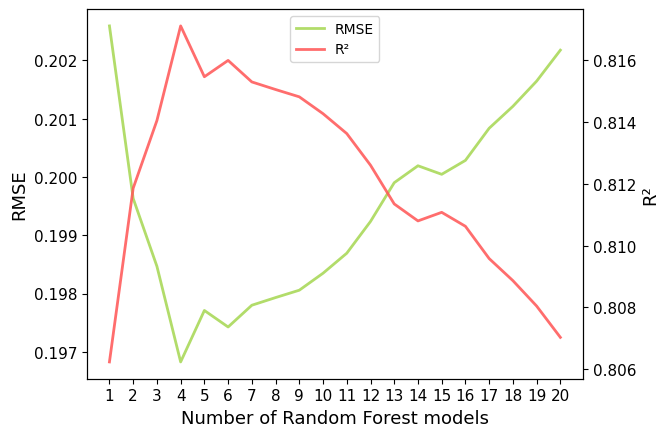

In [73]:
x = results['Number']
y1 = results['RMSE']
y2 = results['R2 Score']

plt.figure(figsize=(8, 5))

fig, ax1 = plt.subplots()

line1 = ax1.plot(x, y1, color='#7bc40095', label='RMSE', linewidth=2)
ax1.set_xlabel('Number of Random Forest models', fontsize=13)
ax1.set_ylabel('RMSE', fontsize=13)
ax1.tick_params(axis='y', labelsize=11)

ax2 = ax1.twinx()
line2 = ax2.plot(x, y2, color='#ff5757dd', label='R²', linewidth=2)
ax2.set_ylabel('R²', fontsize=13)
ax2.tick_params(axis='y', labelsize=11)

lines = line1 + line2
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='upper center')

ax1.set_xticks(x)
ax1.set_xticklabels(x.astype(int), fontsize=11)

plt.show()

Number = 4

RMSE = 0.196828

R² = 	0.817107

#### XGBoost Regression

In [76]:
X = X_model1.copy()
y = y_model1.copy()

_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)


model = xgb.XGBRegressor()
model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=0)

y_pred= model.predict(X_test)

reg_model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
reg_model_diff

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)

print('Root Mean Square Error:', rmse)
print('R2 Score:', r2)

Mean Absolute Error: 0.13718387680138977
Mean Square Error: 0.03940963968433914
Root Mean Square Error: 0.1985186129418074
R2 Score: 0.8139516444995453


In [77]:
# Tuning the hyper-parameters for XGBoost regression

X = X_model1.copy()
y = y_model1.copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

param_grid = {
    'n_estimators': [1,10, 50, 100, 200],
    'random_state': [0, 1, 2, 3, 4, 5 , 6, 7, 8, 9, 10],
    'max_depth': [None, 1, 2, 3, 4, 5],
    'criterion': ['friedman_mse', 'absolute_error', 'squared_error']
}

best_rmse = float('inf')
best_params = {}

for n_estimators in param_grid['n_estimators']:
  for random_state in param_grid['random_state']:
    for max_depth in param_grid['max_depth']:
      model = xgb.XGBRegressor(n_estimators=n_estimators, random_state = random_state)
      model.fit(X_train, y_train)

      y_pred = model.predict(X_test)
      rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

      if rmse < best_rmse :
        best_rmse = rmse
        best_params = {
        'n_estimators': n_estimators,
        'random_state': random_state,
        'max_depth': max_depth,
        }
        print(f"Best_params: n_estimators={n_estimators}, random_state={random_state}, max_depth={max_depth}")
        print(f"RMSE: {rmse:.4f}")
        print("------------------------")


print(f"Parameters: n_estimators={n_estimators}, random_state={random_state}, max_depth={max_depth}")
print(f"RMSE: {rmse:.4f}")
print("------------------------")

model = xgb.XGBRegressor(**best_params)
model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=0)

y_pred= model.predict(X_test)

reg_model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
reg_model_diff

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('Best parameters:', best_params)
print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', rmse)
print('R2 Score:', r2)

Best_params: n_estimators=1, random_state=0, max_depth=None
RMSE: 0.4283
------------------------
Best_params: n_estimators=10, random_state=0, max_depth=None
RMSE: 0.2120
------------------------
Best_params: n_estimators=50, random_state=0, max_depth=None
RMSE: 0.1929
------------------------
Parameters: n_estimators=200, random_state=10, max_depth=5
RMSE: 0.2007
------------------------
Best parameters: {'n_estimators': 50, 'random_state': 0, 'max_depth': None}
Mean Absolute Error: 0.13261786305964948
Mean Square Error: 0.03719147554634815
Root Mean Square Error: 0.19285091533707624
R2 Score: 0.824423341104965


Best parameters: {'n_estimators': 50, 'random_state': 0, 'max_depth': None}

Mean Absolute Error: 0.13261786305964948

Mean Square Error: 0.03719147554634815

Root Mean Square Error: 0.19285091533707624

R2 Score: 0.824423341104965

### Result of Model 1

In [78]:
X = X_model1.copy()
y = y_model1.copy()

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

model = xgb.XGBRegressor(n_estimators = 50, random_state=0)
model.fit(X_train, y_train)

y_pred= model.predict(X_test)

reg_model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
reg_model_diff

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)

print('Root Mean Square Error:', rmse)
print('R2 Score:', r2)

Mean Absolute Error: 0.13261786305964948
Mean Square Error: 0.03719147554634815
Root Mean Square Error: 0.19285091533707624
R2 Score: 0.824423341104965


In [80]:
best_results = []

for n_estimators in range(0, 101):

    model = xgb.XGBRegressor(n_estimators=n_estimators)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    best_results.append({'n_estimators': n_estimators, 'RMSE': rmse, 'R2 Score': r2})

results_df = pd.DataFrame(best_results)

sorted_results = results_df.sort_values(by='RMSE', ascending=True)



In [86]:
print(sorted_results)

    n_estimators      RMSE  R2 Score
39            39  0.191410  0.827037
37            37  0.191522  0.826834
38            38  0.191683  0.826544
41            41  0.191810  0.826313
36            36  0.191899  0.826153
..           ...       ...       ...
4              4  0.269751  0.656482
3              3  0.295942  0.586537
2              2  0.351602  0.416385
1              1  0.428312  0.133949
0              0  0.544882 -0.401614

[101 rows x 3 columns]


In [81]:
best_20_onset_1 = pd.DataFrame(sorted_results.head(20))
best_20_onset_1 = best_20_onset_1.reset_index(drop=True)

In [82]:
predicted = []

for i in range (0,20) :

  model = xgb.XGBRegressor(n_estimators=best_20_onset_1['n_estimators'][i])
  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)

  predicted.append(y_pred)

predicted_result = pd.DataFrame(predicted)

In [83]:
results = []

for i in range (1,21) :
  selected_rows = predicted_result.iloc[0:i]

  sum_rows = selected_rows.sum(axis=0)
  num_rows = selected_rows.shape[0]

  mean_values_rows = sum_rows / num_rows

  mae = metrics.mean_absolute_error(y_test, mean_values_rows)
  mse = metrics.mean_squared_error(y_test, mean_values_rows)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_test, mean_values_rows)

  results.append({'Number': i, 'RMSE': rmse, 'R2 Score': r2})

In [84]:
results = pd.DataFrame(results)

<Figure size 800x500 with 0 Axes>

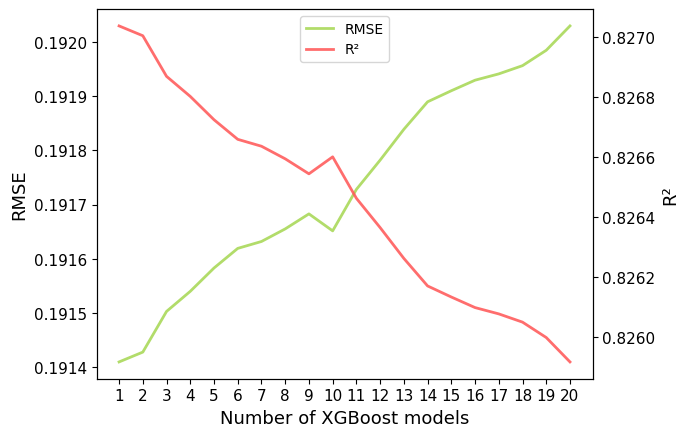

In [85]:
x = results['Number']
y1 = results['RMSE']
y2 = results['R2 Score']

plt.figure(figsize=(8, 5))

fig, ax1 = plt.subplots()

line1 = ax1.plot(x, y1, color='#7bc40095', label='RMSE', linewidth=2)
ax1.set_xlabel('Number of XGBoost models', fontsize=13)
ax1.set_ylabel('RMSE', fontsize=13)
ax1.tick_params(axis='y', labelsize=11)

ax2 = ax1.twinx()
line2 = ax2.plot(x, y2, color='#ff5757dd', label='R²', linewidth=2)
ax2.set_ylabel('R²', fontsize=13)
ax2.tick_params(axis='y', labelsize=11)

lines = line1 + line2
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='upper center')

ax1.set_xticks(x)
ax1.set_xticklabels(x.astype(int), fontsize=11)

plt.show()

Number = 1

RMSE = 0.191410

R² = 0.827037

n_estimators = 39


In [87]:
model = xgb.XGBRegressor(n_estimators=39)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

y_pred_model_1 = y_pred.copy()

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)

print('Root Mean Square Error:', rmse)
print('R2 Score:', r2)

Mean Absolute Error: 0.13256046755568868
Mean Square Error: 0.03663776856667338
Root Mean Square Error: 0.19140994897516006
R2 Score: 0.8270373277798685


Mean Absolute Error: 0.13256046755568868

Mean Square Error: 0.03663776856667338

Root Mean Square Error: 0.19140994897516006

R2 Score: 0.8270373277798685


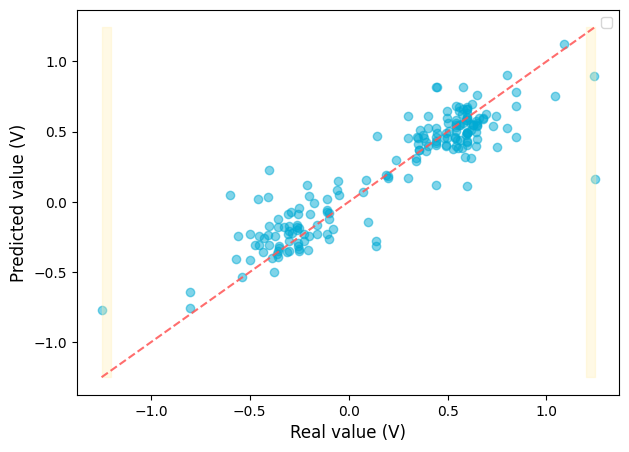

In [88]:
plt.figure(figsize=(7, 5))
plt.scatter(y_test, y_pred, c='#00aad4ff', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', c='#ff5757dd')
plt.xlabel('Real value (V)', fontsize=12)
plt.ylabel('Predicted value (V)', fontsize=12)
plt.title('')

region1_value = -1.2
region2_value = 1.2

plt.fill_between([min(y_test), region1_value], min(y_test), max(y_test), color='#ffeeaaff', alpha=0.3)

plt.fill_between([region2_value, max(y_test)], min(y_test), max(y_test), color='#ffeeaaff', alpha=0.3)

plt.legend()

plt.show()

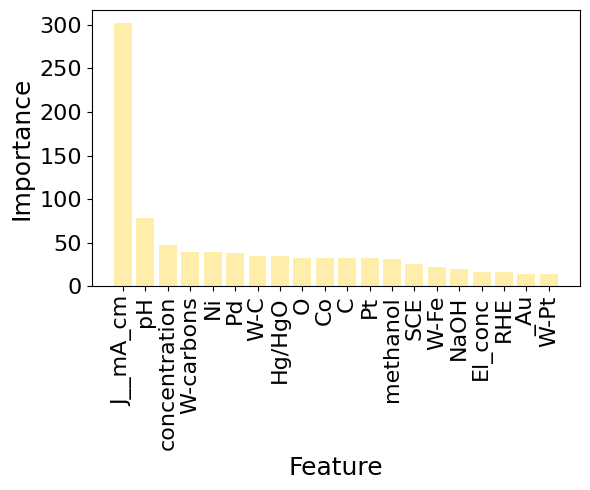

In [90]:
# Feature Importance

xgb = XGBRegressor(n_estimators=39, random_state=100)
xgb.fit(X_train, y_train)

xgb = XGBRegressor(n_estimators=39, random_state=100)
xgb.fit(X_train, y_train)

importances = xgb.get_booster().get_score(importance_type='weight')
feature_names = X_train.columns

sorted_importances = {k: v for k, v in sorted(importances.items(), key=lambda item: item[1], reverse=True)}

bar_color = '#ffeeaaff'

top_features = list(sorted_importances.keys())[:20]
top_importances = [sorted_importances[feature] for feature in top_features]

plt.figure(figsize=(6, 5))
plt.bar(range(len(top_features)), top_importances, align='center', color=bar_color)
plt.xticks(range(len(top_features)), top_features, rotation='vertical', fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel('Importance', fontsize=18)
plt.xlabel('Feature', fontsize=18)
plt.tight_layout()
plt.show()

In [91]:
# SHAP

random_state = 100

xgb = XGBRegressor(n_estimators=39, random_state=random_state)
xgb.fit(X_train, y_train)

explainer = shap.Explainer(xgb, X_train)

sample_index = 186
shap_values = explainer(X_test.iloc[sample_index])

shap.initjs()
shap.force_plot(explainer.expected_value, shap_values.values, X_test.iloc[sample_index])

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


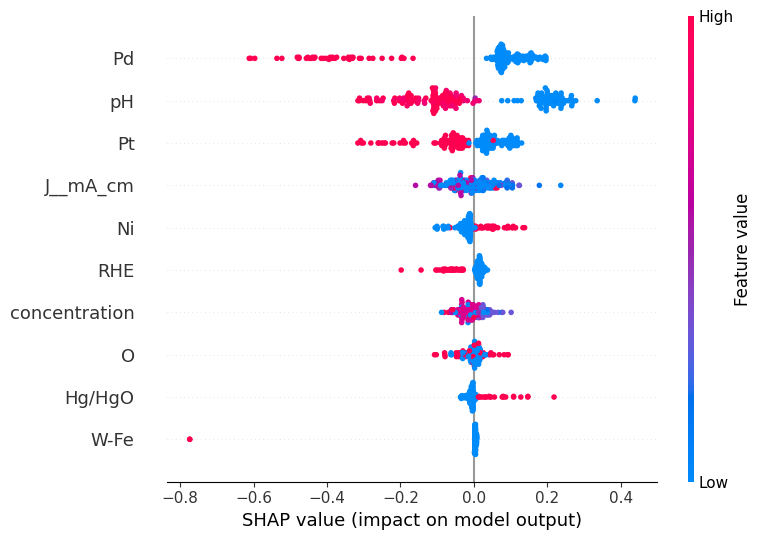

In [92]:
explainer = shap.Explainer(model)
shap_values = explainer(X_test)

num_features = 10

shap.summary_plot(shap_values, X_test, max_display=num_features)

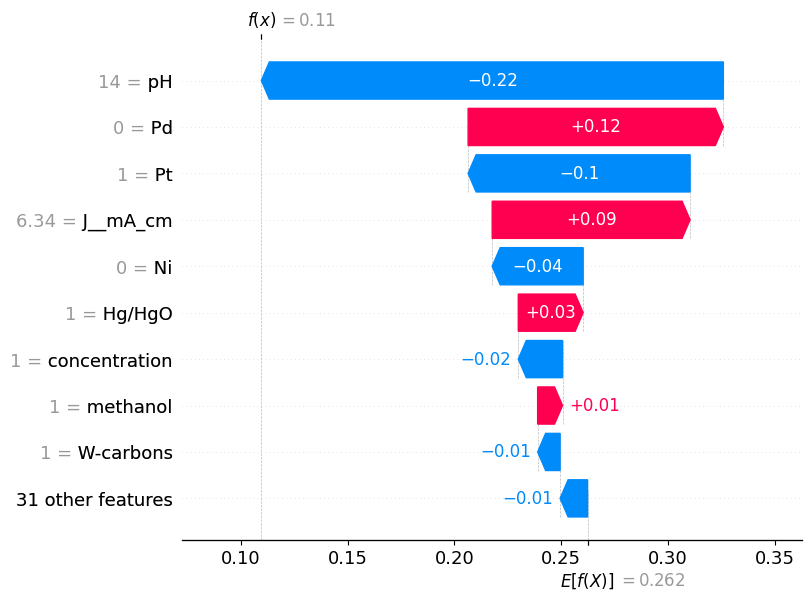

In [93]:
shap.plots.waterfall(shap_values[186])

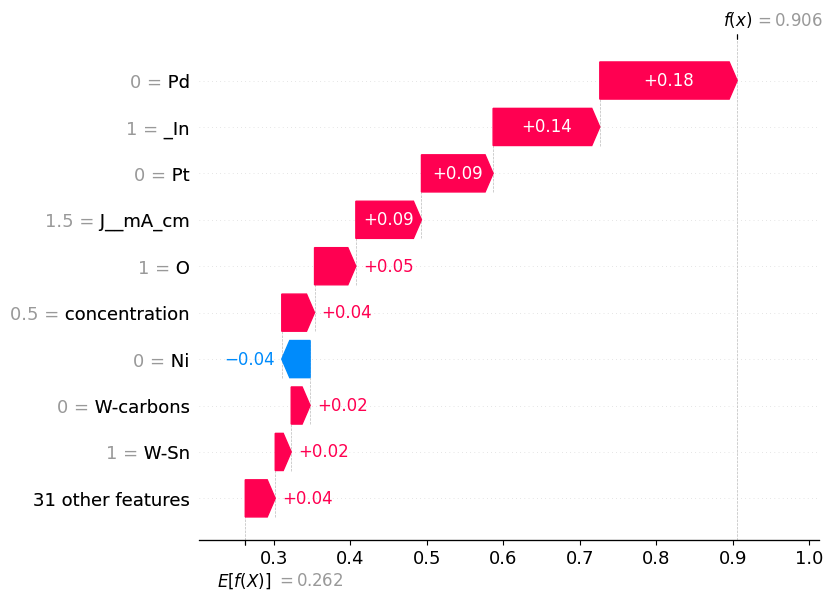

In [95]:
shap.plots.waterfall(shap_values[181])

## Model 2

### Organizing the features

It is necessary to include the predicted Oxidation Potential value in the features.

In [97]:
X = date_model[['W-carbons','carbons','C', 'Org', 'W-graphite','W-C', 'W-Sn','W-Au','Au','W-Pd','Pd','_In','W-Fe','_Ni','Ni','Pt','W-Pt', 'W-N','O','Zn','Ag','Ru','B','Zr','Ce','Bi','W','Sb','Te', 'Cu', '_Cu', 'Rh','_Sn', 'positive','pH','El_conc','methanol','ethanol','H2SO4','HClO4','KOH','NaOH','Hg/HgO','MMS','RHE','SCE', 'J__mA_cm', 'concentration', 'Ox_Onset', 'Pot_Ox_V (SHE)','Pot_Onset_V (SHE)']]
y = date_model[['Pot_Ox_V (SHE)', 'Pot_Onset_V (SHE)']]

In [98]:
# model 1

X_model1 = date_model_onset[['W-C','W-carbons','C','Org', 'W-Sn','_Au','W-Ti','Pd','W-Pd','_In','W-Fe','Ni','W-Ni','Pt','W-Pt','W-N','O','Zn','Ag','Co','S','Bi','Te', 'negative','positive', 'Ru','Aniline', '_N', 'pH','El_conc','J__mA_cm','methanol','ethanol','HClO4','NaOH','Hg/HgO','MMS','RHE','SCE', 'concentration']]
y_model1 = date_model_onset['Pot_Onset_V (SHE)']


In [99]:
# Organizing the test data
different_indices = X.index.difference(X_model1.index)
X = X.drop(different_indices)
different_indices = X_model1.index.difference(X.index)
X_model1 = X_model1.drop(different_indices)

different_indices = y.index.difference(y_model1.index)
y = y.drop(different_indices)
different_indices = y_model1.index.difference(date_model.index)
y_model1 = y_model1.drop(different_indices)

In [100]:
# oxidation potential prediction

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

X_train_2 = X_train.drop("Pot_Ox_V (SHE)", axis=1)
X_test_2 = X_test.drop("Pot_Ox_V (SHE)", axis=1)

y_train_2 = y_train['Pot_Ox_V (SHE)']
y_test_2 = y_test['Pot_Ox_V (SHE)']

X_train_2 = X_train_2.drop("Pot_Onset_V (SHE)", axis=1)
X_test_2 = X_test_2.drop("Pot_Onset_V (SHE)", axis=1)

In [101]:
predicted = []

for i in range (0,4) :

  model = RandomForestRegressor(n_estimators=100, random_state=best_20_ox['Random State'][i])
  model.fit(X_train_2, y_train_2)

  y_pred = model.predict(X_test_2)

  predicted.append(y_pred)

predicted_result = pd.DataFrame(predicted)

In [102]:
selected_rows = predicted_result.copy()

sum_rows = selected_rows.sum(axis=0)
num_rows = selected_rows.shape[0]

mean_values_rows = sum_rows / num_rows

mae = metrics.mean_absolute_error(y_test_2, mean_values_rows)
mse = metrics.mean_squared_error(y_test_2, mean_values_rows)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_2, mean_values_rows)

print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)

print('Root Mean Square Error:', rmse)
print('R2 Score:', r2)

Mean Absolute Error: 0.1161982399923606
Mean Square Error: 0.03796353996875575
Root Mean Square Error: 0.19484234644644308
R2 Score: 0.7883254288469514


In [103]:
mean_values_rows = pd.DataFrame(mean_values_rows)

In [104]:
pred_oxid = mean_values_rows.copy()

In [105]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [106]:
X_test.insert(loc=49, column = 'y_pred', value = mean_values_rows)

In [107]:
X_train.dropna(subset = ['Pot_Onset_V (SHE)'], axis=0, inplace = True)
y_train.dropna(subset = ['Pot_Onset_V (SHE)'], axis=0, inplace = True)
X_test.dropna(subset = ['Pot_Onset_V (SHE)'], axis=0, inplace = True)
y_test.dropna(subset = ['Pot_Onset_V (SHE)'], axis=0, inplace = True)

In [108]:
X_train_onset = X_train.drop("Pot_Onset_V (SHE)", axis=1)
y_train_onset = y_train['Pot_Onset_V (SHE)']

In [109]:
X_test_onset = X_test.drop("Pot_Onset_V (SHE)", axis=1)
X_test_onset = X_test_onset.drop("Pot_Ox_V (SHE)", axis=1)


In [110]:
X_test_onset.rename(columns={'y_pred': 'Pot_Ox_V (SHE)'}, inplace=True)

In [111]:
y_test_onset = y_test['Pot_Onset_V (SHE)']

### Algorithm study
Comparison between the algorithms used to develop the model. The Random Forest regression exhibited the best results and was selected.

#### Linear regression

In [113]:
reg_model = linear_model.LinearRegression()

reg_model = LinearRegression().fit(X_train_onset, y_train_onset)

print('Intercept: ',reg_model.intercept_)

list(zip(X, reg_model.coef_))

y_pred= reg_model.predict(X_test_onset)
x_pred= reg_model.predict(X_train_onset)

reg_model_diff = pd.DataFrame({'Actual value': y_test_onset, 'Predicted value': y_pred})
reg_model_diff

mae = metrics.mean_absolute_error(y_test_onset, y_pred)
mse = metrics.mean_squared_error(y_test_onset, y_pred)
rmse = metrics.mean_squared_error(y_test_onset, y_pred, squared=False)
r2 = r2_score(y_test_onset, y_pred)

print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)

print('Root Mean Square Error:', rmse)
print('R2 Score:', r2)

Intercept:  -1.8596235662471372e-14
Mean Absolute Error: 0.11619823999236069
Mean Square Error: 0.037963539968755323
Root Mean Square Error: 0.194842346446442
R2 Score: 0.8207785141722705


Intercept:  -1.8596235662471372e-14

Mean Absolute Error: 0.11619823999236069

Mean Square Error: 0.037963539968755323

Root Mean Square Error: 0.194842346446442

R2 Score: 0.8207785141722705


#### Random Forest regression

In [114]:
model = RandomForestRegressor(random_state=7)
model.fit(X_train_onset, y_train_onset)

y_pred= model.predict(X_test_onset)

reg_model_diff = pd.DataFrame({'Actual value': y_test_onset, 'Predicted value': y_pred})
reg_model_diff

mae = metrics.mean_absolute_error(y_test_onset, y_pred)
mse = metrics.mean_squared_error(y_test_onset, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test_onset, y_pred))
r2 = r2_score(y_test_onset, y_pred)

print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)

print('Root Mean Square Error:', rmse)
print('R2 Score:', r2)

Mean Absolute Error: 0.11866608609625667
Mean Square Error: 0.038074015724985616
Root Mean Square Error: 0.19512564087014708
R2 Score: 0.8202569708916431


Mean Absolute Error: 0.11866608609625667

Mean Square Error: 0.038074015724985616

Root Mean Square Error: 0.19512564087014708

R2 Score: 0.8202569708916431

In [115]:
# Tuning the hyper-parameters for Random Forest

param_grid = {
    'n_estimators': [1,10, 50, 100, 200],
    'random_state': [0, 1, 2, 3, 4, 5 , 6, 7, 8, 9, 10],
    'max_depth': [None, 1, 2, 3, 4, 5],
    'criterion': ['friedman_mse', 'absolute_error', 'squared_error']
}

best_rmse = float('inf')
best_params = {}

for n_estimators in param_grid['n_estimators']:
  for random_state in param_grid['random_state']:
    for max_depth in param_grid['max_depth']:
      model = RandomForestRegressor(n_estimators=n_estimators, random_state = random_state)
      model.fit(X_train_onset, y_train_onset)

      y_pred = model.predict(X_test_onset)
      rmse = np.sqrt(metrics.mean_squared_error(y_test_onset, y_pred))

      if rmse < best_rmse :
        best_rmse = rmse
        best_params = {
        'n_estimators': n_estimators,
        'random_state': random_state,
        'max_depth': max_depth,
        }
        print(f"Best_params: n_estimators={n_estimators}, random_state={random_state}, max_depth={max_depth}")
        print(f"RMSE: {rmse:.4f}")
        print("------------------------")


      print(f"Parameters: n_estimators={n_estimators}, random_state={random_state}, max_depth={max_depth}")
      print(f"RMSE: {rmse:.4f}")
      print("------------------------")

best_model = RandomForestRegressor(**best_params)
best_model.fit(X_train_onset, y_train_onset)
y_pred = best_model.predict(X_test_onset)

mae = metrics.mean_absolute_error(y_test_onset, y_pred)
mse = metrics.mean_squared_error(y_test_onset, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test_onset, y_pred))
r2 = r2_score(y_test_onset, y_pred)

print('Best parameters:', best_params)
print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', rmse)
print('R2 Score:', r2)

Best_params: n_estimators=1, random_state=0, max_depth=None
RMSE: 0.2206
------------------------
Parameters: n_estimators=1, random_state=0, max_depth=None
RMSE: 0.2206
------------------------
Parameters: n_estimators=1, random_state=0, max_depth=1
RMSE: 0.2206
------------------------
Parameters: n_estimators=1, random_state=0, max_depth=2
RMSE: 0.2206
------------------------
Parameters: n_estimators=1, random_state=0, max_depth=3
RMSE: 0.2206
------------------------
Parameters: n_estimators=1, random_state=0, max_depth=4
RMSE: 0.2206
------------------------
Parameters: n_estimators=1, random_state=0, max_depth=5
RMSE: 0.2206
------------------------
Best_params: n_estimators=1, random_state=1, max_depth=None
RMSE: 0.2171
------------------------
Parameters: n_estimators=1, random_state=1, max_depth=None
RMSE: 0.2171
------------------------
Parameters: n_estimators=1, random_state=1, max_depth=1
RMSE: 0.2171
------------------------
Parameters: n_estimators=1, random_state=1, ma

Best parameters: {'n_estimators': 50, 'random_state': 1, 'max_depth': None}

Mean Absolute Error: 0.11652091122994652

Mean Square Error: 0.0365217581961108

Root Mean Square Error: 0.19110666706347743

R2 Score: 0.827584999335281

In [116]:
best_results = []

for random_state in range(1, 101):

    model = RandomForestRegressor(n_estimators=50, random_state=random_state)
    model.fit(X_train_onset, y_train_onset)

    y_pred = model.predict(X_test_onset)

    mae = metrics.mean_absolute_error(y_test_onset, y_pred)
    mse = metrics.mean_squared_error(y_test_onset, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_onset, y_pred)

    best_results.append({'Random State': random_state, 'RMSE': rmse, 'R2 Score': r2})

results_df = pd.DataFrame(best_results)

sorted_results = results_df.sort_values(by='RMSE', ascending=True)


In [117]:
best_20_onset_2_RF = pd.DataFrame(sorted_results.head(20))
best_20_onset_2_RF = best_20_onset_2_RF.reset_index(drop=True)

In [118]:
predicted = []

for i in range (0,20) :

  model = RandomForestRegressor(n_estimators=50, random_state=best_20_onset_2_RF['Random State'][i])
  model.fit(X_train_onset, y_train_onset)

  y_pred = model.predict(X_test_onset)

  predicted.append(y_pred)

predicted_result = pd.DataFrame(predicted)

In [119]:
results = []

for i in range (1,21) :
  selected_rows = predicted_result.iloc[0:i]

  sum_rows = selected_rows.sum(axis=0)
  num_rows = selected_rows.shape[0]

  mean_values_rows = sum_rows / num_rows

  mae = metrics.mean_absolute_error(y_test_onset, mean_values_rows)
  mse = metrics.mean_squared_error(y_test_onset, mean_values_rows)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_test_onset, mean_values_rows)

  results.append({'Number': i, 'RMSE': rmse, 'R2 Score': r2})

In [120]:
results = pd.DataFrame(results)

<Figure size 800x500 with 0 Axes>

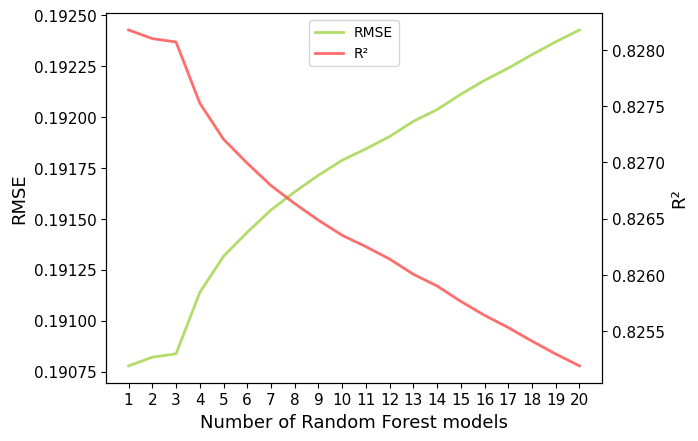

In [121]:
x = results['Number']
y1 = results['RMSE']
y2 = results['R2 Score']

plt.figure(figsize=(8, 5))

fig, ax1 = plt.subplots()

line1 = ax1.plot(x, y1, color='#7bc40095', label='RMSE', linewidth=2)
ax1.set_xlabel('Number of Random Forest models', fontsize=13)
ax1.set_ylabel('RMSE', fontsize=13)
ax1.tick_params(axis='y', labelsize=11)

ax2 = ax1.twinx()
line2 = ax2.plot(x, y2, color='#ff5757dd', label='R²', linewidth=2)
ax2.set_ylabel('R²', fontsize=13)
ax2.tick_params(axis='y', labelsize=11)

lines = line1 + line2
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='upper center')

ax1.set_xticks(x)
ax1.set_xticklabels(x.astype(int), fontsize=11)

plt.show()

In [122]:
display(results)

,Number,RMSE,R2 Score
0,1,0.190778,0.828178
1,2,0.190821,0.828101
2,3,0.190837,0.828071
3,4,0.191139,0.827528
4,5,0.191316,0.827206
5,6,0.191434,0.826993
6,7,0.191544,0.826795
7,8,0.191633,0.826634
8,9,0.191715,0.826486
9,10,0.191788,0.826353


Number = 1

RMSE = 0.190778

R² =	0.828178

random_state = 22

#### XGBoost Regression

In [125]:
import xgboost as xgb
from xgboost import XGBRegressor

model = xgb.XGBRegressor(n_estimators = 39)
model.fit(X_train_onset, y_train_onset)

y_pred= model.predict(X_test_onset)

reg_model_diff = pd.DataFrame({'Actual value': y_test_onset, 'Predicted value': y_pred})
reg_model_diff

mae = metrics.mean_absolute_error(y_test_onset, y_pred)
mse = metrics.mean_squared_error(y_test_onset, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test_onset, y_pred))
r2 = r2_score(y_test_onset, y_pred)

print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)

print('Root Mean Square Error:', rmse)
print('R2 Score:', r2)



Mean Absolute Error: 0.118704396332139
Mean Square Error: 0.038689019326115924
Root Mean Square Error: 0.19669524479792572
R2 Score: 0.8173536099491521


Mean Absolute Error: 0.118704396332139

Mean Square Error: 0.038689019326115924

Root Mean Square Error: 0.19669524479792572

R2 Score: 0.8173536099491521

In [126]:
best_results = []

for n_estimators in range(0, 101):

    model = xgb.XGBRegressor(n_estimators=n_estimators)
    model.fit(X_train_onset, y_train_onset)

    y_pred = model.predict(X_test_onset)

    mae = metrics.mean_absolute_error(y_test_onset, y_pred)
    mse = metrics.mean_squared_error(y_test_onset, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_onset, y_pred)

    best_results.append({'n_estimators': n_estimators, 'RMSE': rmse, 'R2 Score': r2})

results_df = pd.DataFrame(best_results)


sorted_results = results_df.sort_values(by='RMSE', ascending=True)


print(sorted_results.head(10))

    n_estimators      RMSE  R2 Score
68            68  0.196600  0.817531
53            53  0.196607  0.817517
69            69  0.196608  0.817516
52            52  0.196614  0.817505
70            70  0.196618  0.817496
57            57  0.196621  0.817492
58            58  0.196624  0.817485
67            67  0.196626  0.817483
61            61  0.196631  0.817474
54            54  0.196631  0.817473


In [127]:
best_20_onset_2 = pd.DataFrame(sorted_results.head(20))
best_20_onset_2= best_20_onset_2.reset_index(drop=True)

In [128]:
predicted = []

for i in range (0,20) :

  model = xgb.XGBRegressor(n_estimators=best_20_onset_2['n_estimators'][i])
  model.fit(X_train_onset, y_train_onset)

  y_pred = model.predict(X_test_onset)

  predicted.append(y_pred)

predicted_result = pd.DataFrame(predicted)

In [129]:
results = []

for i in range (1,21) :
  selected_rows = predicted_result.iloc[0:i]

  sum_rows = selected_rows.sum(axis=0)
  num_rows = selected_rows.shape[0]

  mean_values_rows = sum_rows / num_rows

  mae = metrics.mean_absolute_error(y_test_onset, mean_values_rows)
  mse = metrics.mean_squared_error(y_test_onset, mean_values_rows)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_test_onset, mean_values_rows)

  results.append({'Number': i, 'RMSE': rmse, 'R2 Score': r2})

In [130]:
results = pd.DataFrame(results)

<Figure size 800x500 with 0 Axes>

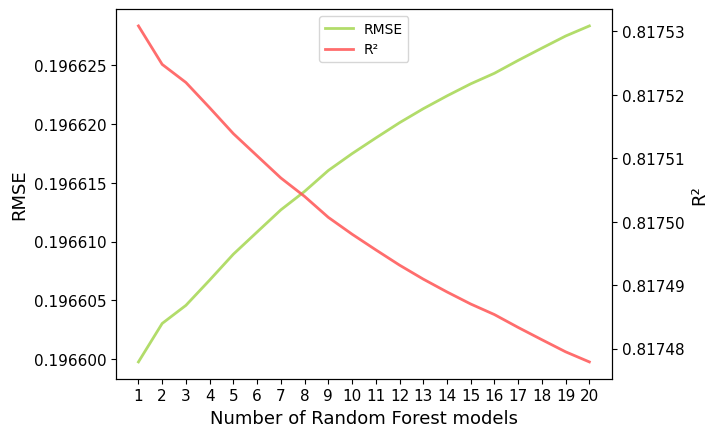

In [131]:
x = results['Number']
y1 = results['RMSE']
y2 = results['R2 Score']

plt.figure(figsize=(8, 5))

fig, ax1 = plt.subplots()

line1 = ax1.plot(x, y1, color='#7bc40095', label='RMSE', linewidth=2)
ax1.set_xlabel('Number of Random Forest models', fontsize=13)
ax1.set_ylabel('RMSE', fontsize=13)
ax1.tick_params(axis='y', labelsize=11)

ax2 = ax1.twinx()
line2 = ax2.plot(x, y2, color='#ff5757dd', label='R²', linewidth=2)
ax2.set_ylabel('R²', fontsize=13)
ax2.tick_params(axis='y', labelsize=11)

lines = line1 + line2
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='upper center')

ax1.set_xticks(x)
ax1.set_xticklabels(x.astype(int), fontsize=11)

plt.show()

In [132]:
display(results)

,Number,RMSE,R2 Score
0,1,0.196600,0.817531
1,2,0.196603,0.817525
2,3,0.196605,0.817522
3,4,0.196607,0.817518
4,5,0.196609,0.817514
5,6,0.196611,0.817510
6,7,0.196613,0.817507
7,8,0.196614,0.817504
8,9,0.196616,0.817501
9,10,0.196617,0.817498


Number = 1

RMSE = 0.196600

R² = 0.817531

n_estimators = 68

### Model 2

In [133]:
model = RandomForestRegressor(n_estimators=50, random_state=22)
model.fit(X_train_onset, y_train_onset)

y_pred = model.predict(X_test_onset)


In [134]:
predicted_result_model_2 = y_pred.copy()

In [135]:
mae = metrics.mean_absolute_error(y_test_onset, y_pred)
mse = metrics.mean_squared_error(y_test_onset, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_onset, y_pred)

In [136]:
print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)

print('Root Mean Square Error:', rmse)
print('R2 Score:', r2)

Mean Absolute Error: 0.11670132941176473
Mean Square Error: 0.0363961547367138
Root Mean Square Error: 0.1907777626892448
R2 Score: 0.8281779587546807


Mean Absolute Error: 0.11670132941176473

Mean Square Error: 0.0363961547367138

Root Mean Square Error: 0.1907777626892448

R2 Score: 0.8281779587546807

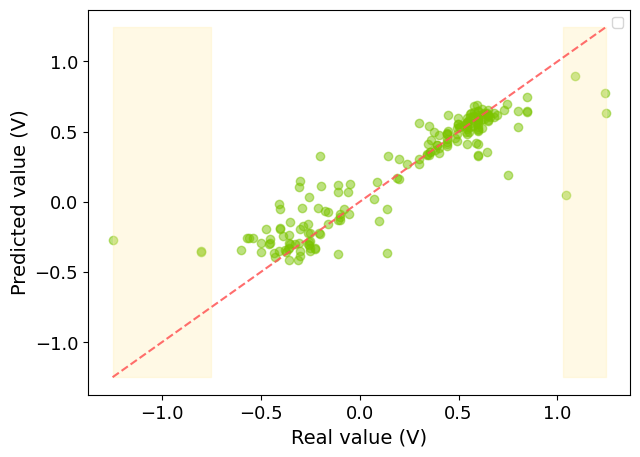

In [139]:
plt.figure(figsize=(7, 5))
plt.scatter(y_test_onset, y_pred, c='#7bc40095', alpha=0.5)
plt.plot([min(y_test_onset), max(y_test_onset)], [min(y_test_onset), max(y_test_onset)], '--', c='#ff5757dd')
plt.xlabel('Real value (V)', fontsize=14)
plt.ylabel('Predicted value (V)', fontsize=14)
plt.title('')

region1_value = -0.75
region2_value = 1.03

plt.fill_between([min(y_test_onset), region1_value], min(y_test_onset), max(y_test_onset), color='#ffeeaaff', alpha=0.3)

plt.fill_between([region2_value, max(y_test_onset)], min(y_test_onset), max(y_test_onset), color='#ffeeaaff', alpha=0.3)
plt.tick_params(axis='both', which='major', labelsize=13)
plt.legend()

plt.show()

In [140]:
y = y.drop("Pot_Ox_V (SHE)", axis=1)

In [141]:
X = X.drop("Pot_Onset_V (SHE)", axis=1)

In [142]:
# Feature Importance

model = RandomForestRegressor(n_estimators = 50, random_state=22)
model.fit(X_train_onset, y_train_onset)

importances = model.feature_importances_

In [143]:
random_forest = model
feature_importance = random_forest.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

std_deviation = np.std([tree.feature_importances_ for tree in random_forest.estimators_], axis=0)
feature_importance_df['Std_Dev'] = std_deviation

top_features = feature_importance_df['Feature'][:10]
top_importances = feature_importance_df['Importance'][:10]
std_devs = feature_importance_df['Std_Dev'][:10]

FixedFormatter should only be used together with FixedLocator


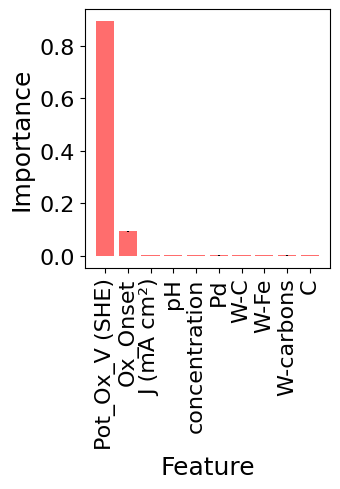

In [144]:

bar_color = '#ff5757dd'

plt.figure(figsize=(3.5, 5))
plt.bar(top_features, top_importances, color=bar_color, yerr=std_devs)
plt.xticks(rotation=90, fontsize=16)
plt.yticks(fontsize=16)


custom_labels = ["Pot_Ox_V (SHE)", "Ox_Onset", "J (mA cm²)", "pH", "concentration", 'Pd','W-C','W-Fe','W-carbons','C']
plt.gca().set_xticklabels(custom_labels)

plt.xlabel('Feature', fontsize=18)
plt.ylabel('Importance', fontsize=18)
plt.tight_layout()  # Ensures proper spacing
plt.show()

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


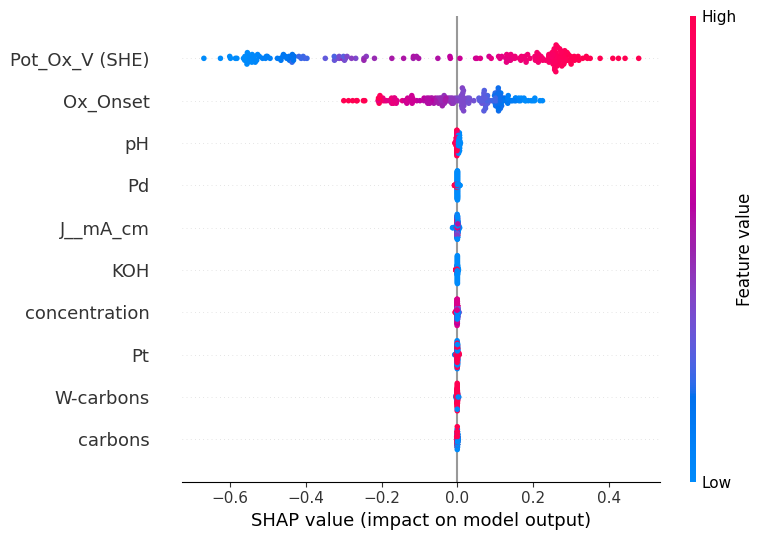

In [153]:
# SHAP

model = RandomForestRegressor(n_estimators = 50, random_state=22)
model.fit(X_train_onset, y_train_onset)

explainer = shap.Explainer(model)
shap_values = explainer(X_test_onset)


num_features = 10

shap.summary_plot(shap_values, X_test_onset, max_display=num_features)

In [151]:
model = RandomForestRegressor(n_estimators = 50, random_state=22)
model.fit(X_train_onset, y_train_onset)

explainer = shap.Explainer(model, X_train_onset)

sample_index = 181
shap_values = explainer(X_test_onset.iloc[sample_index])

shap.initjs()
shap.force_plot(explainer.expected_value, shap_values.values, X_test_onset.iloc[sample_index])

In [152]:
explainer = shap.Explainer(model, X_train_onset)

sample_index = 186
shap_values = explainer(X_test_onset.iloc[sample_index])

shap.initjs()
shap.force_plot(explainer.expected_value, shap_values.values, X_test_onset.iloc[sample_index])

## Model 1 + Model 2

In [154]:
# model 1

X_model1 = date_model_onset[['W-C','W-carbons','C','Org', 'W-Sn','_Au','W-Ti','Pd','W-Pd','_In','W-Fe','Ni','W-Ni','Pt','W-Pt','W-N','O','Zn','Ag','Co','S','Bi','Te', 'negative','positive', 'Ru','Aniline', '_N', 'pH','El_conc','J__mA_cm','methanol','ethanol','HClO4','NaOH','Hg/HgO','MMS','RHE','SCE', 'concentration']]
y_model1 = date_model_onset['Pot_Onset_V (SHE)']



In [155]:
# model 2

X = date_model[['W-carbons','carbons','C', 'Org', 'W-graphite','W-C', 'W-Sn','W-Au','Au','W-Pd','Pd','_In','W-Fe','_Ni','Ni','Pt','W-Pt', 'W-N','O','Zn','Ag','Ru','B','Zr','Ce','Bi','W','Sb','Te', 'Cu', '_Cu', 'Rh','_Sn', 'positive','pH','El_conc','methanol','ethanol','H2SO4','HClO4','KOH','NaOH','Hg/HgO','MMS','RHE','SCE', 'J__mA_cm', 'concentration', 'Ox_Onset', 'Pot_Ox_V (SHE)','Pot_Onset_V (SHE)']]
y = date_model[['Pot_Ox_V (SHE)', 'Pot_Onset_V (SHE)']]




In [156]:
# Organizing the test data
different_indices = X.index.difference(X_model1.index)
X = X.drop(different_indices)
different_indices = X_model1.index.difference(X.index)
X_model1 = X_model1.drop(different_indices)

different_indices = y.index.difference(y_model1.index)
y = y.drop(different_indices)
different_indices = y_model1.index.difference(date_model.index)
y_model1 = y_model1.drop(different_indices)

In [157]:
X_train,X_test, y_train, y_test = train_test_split(X_model1, y_model1, test_size = 0.3, random_state = 100)


In [158]:
predicted = []

for i in range (0,20) :

  model = RandomForestRegressor(n_estimators=50, random_state=best_20_onset_2_RF['Random State'][i])
  model.fit(X_train_onset, y_train_onset)

  y_pred = model.predict(X_test_onset)

  predicted.append(y_pred)

predicted_result = pd.DataFrame(predicted)

In [159]:
predicted_result.loc[-1] = y_pred_model_1
predicted_result.index = predicted_result.index + 1
predicted_result.sort_index(inplace=True)

In [160]:
results = []

for i in range (1,21) :
  selected_rows = predicted_result.iloc[0:i]

  sum_rows = selected_rows.sum(axis=0)
  num_rows = selected_rows.shape[0]

  mean_values_rows = sum_rows / num_rows

  mae = metrics.mean_absolute_error(y_test_onset, mean_values_rows)
  mse = metrics.mean_squared_error(y_test_onset, mean_values_rows)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_test_onset, mean_values_rows)

  results.append({'Number': i, 'RMSE': rmse, 'R2 Score': r2})

In [161]:
results = pd.DataFrame(results)

<Figure size 800x300 with 0 Axes>

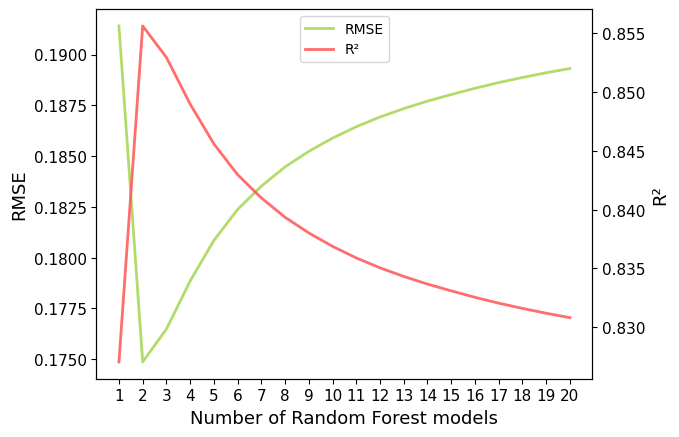

In [162]:
x = results['Number']
y1 = results['RMSE']
y2 = results['R2 Score']

plt.figure(figsize=(8, 3))

fig, ax1 = plt.subplots()

line1 = ax1.plot(x, y1, color='#7bc40095', label='RMSE', linewidth=2)
ax1.set_xlabel('Number of Random Forest models', fontsize=13)
ax1.set_ylabel('RMSE', fontsize=13)
ax1.tick_params(axis='y', labelsize=11)

ax2 = ax1.twinx()
line2 = ax2.plot(x, y2, color='#ff5757dd', label='R²', linewidth=2)
ax2.set_ylabel('R²', fontsize=13)
ax2.tick_params(axis='y', labelsize=11)

lines = line1 + line2
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='upper center')

ax1.set_xticks(x)
ax1.set_xticklabels(x.astype(int), fontsize=11)

plt.show()

In [163]:
display(results)

,Number,RMSE,R2 Score
0,1,0.191410,0.827037
1,2,0.174869,0.855639
2,3,0.176486,0.852958
3,4,0.178852,0.848987
4,5,0.180847,0.845600
5,6,0.182375,0.842980
6,7,0.183522,0.840999
7,8,0.184471,0.839350
8,9,0.185235,0.838017
9,10,0.185886,0.836876


In [164]:
y = pd.DataFrame(y_pred_model_1)

In [165]:
y[1]=predicted_result_model_2

In [166]:
y['mean'] = y[[0, 1]].mean(axis=1)

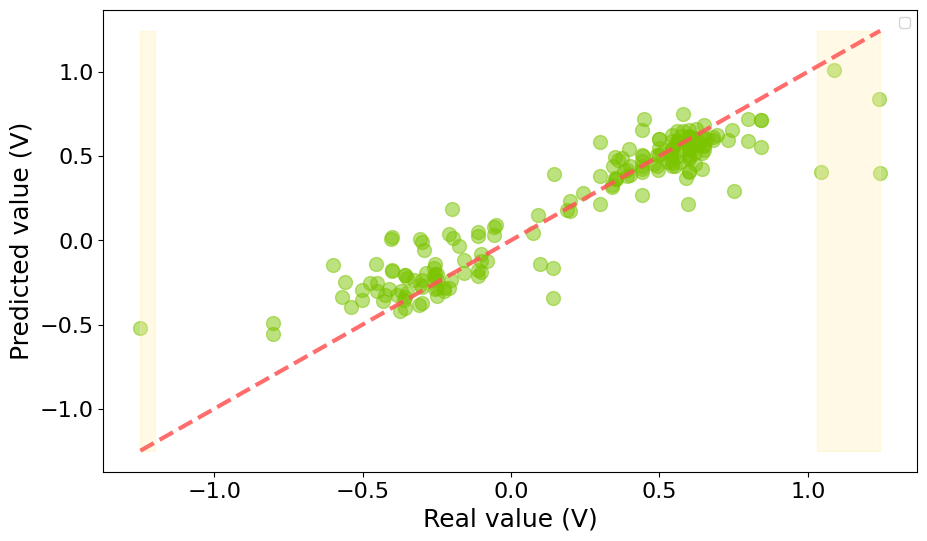

In [167]:
plt.figure(figsize=(10.5, 6))
plt.scatter(y_test_onset, y['mean'], c='#7bc40095', alpha=0.5, s=100)
plt.plot([min(y_test_onset), max(y_test_onset)], [min(y_test_onset), max(y_test_onset)], '--', c='#ff5757dd', linewidth=3)
plt.xlabel('Real value (V)', fontsize=18)
plt.ylabel('Predicted value (V)', fontsize=18)
plt.title('')

region1_value = -1.2
region2_value = 1.03

plt.fill_between([min(y_test_onset), region1_value], min(y_test_onset), max(y_test_onset), color='#ffeeaaff', alpha=0.3)

plt.fill_between([region2_value, max(y_test_onset)], min(y_test_onset), max(y_test_onset), color='#ffeeaaff', alpha=0.3)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.legend()

plt.show()

In [168]:
mae = metrics.mean_absolute_error(y_test_onset, y['mean'])
mse = metrics.mean_squared_error(y_test_onset, y['mean'])
rmse = np.sqrt(mse)
r2 = r2_score(y_test_onset, y['mean'])

In [169]:
print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)

print('Root Mean Square Error:', rmse)
print('R2 Score:', r2)

Mean Absolute Error: 0.11732110535774512
Mean Square Error: 0.03057922958365555
Root Mean Square Error: 0.1748691784839614
R2 Score: 0.8556389903059483


Mean Absolute Error: 0.11732110535774512

Mean Square Error: 0.03057922958365555

Root Mean Square Error: 0.1748691784839614

R2 Score: 0.8556389903059483